# Basic EDA with Sweetviz 
Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application.

The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

Source: [Sweetviz Project Description](https://pypi.org/project/sweetviz/#description)

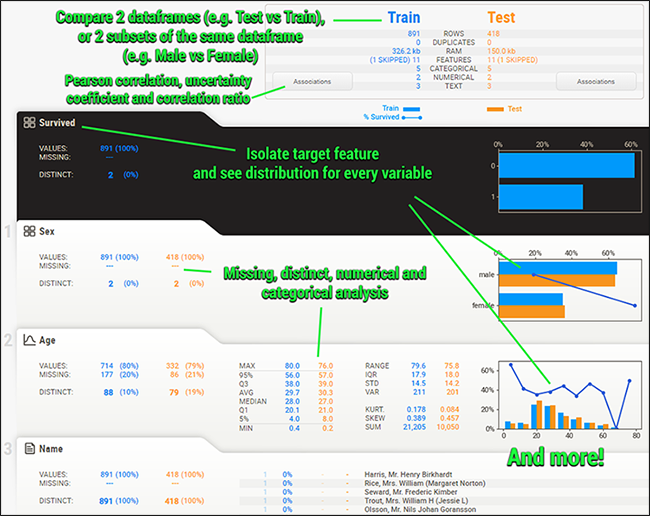

In [1]:
# !pip install sweetviz
import sweetviz as sv
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.datasets import get_data # for iris datasets

In [2]:
income = get_data('income')

age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country  income >50K  
0             0              40  United-States            0  
1             0              13  United-States            0  
2             0              40  United-States            0  
3             0              40  United-States            0  
4             0              40           Cuba            0

In [4]:
train_df, test_df = train_test_split(income, test_size = 0.2, random_state=123)

## 1. analyze() method

                                             |                                             | [  0%]   00:00 ->…


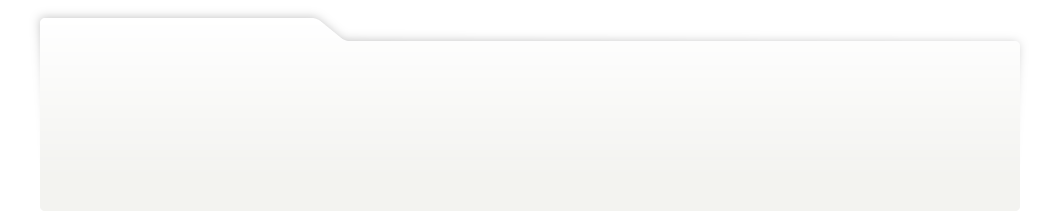
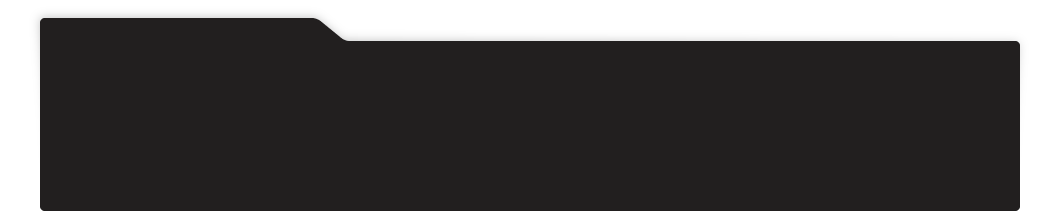
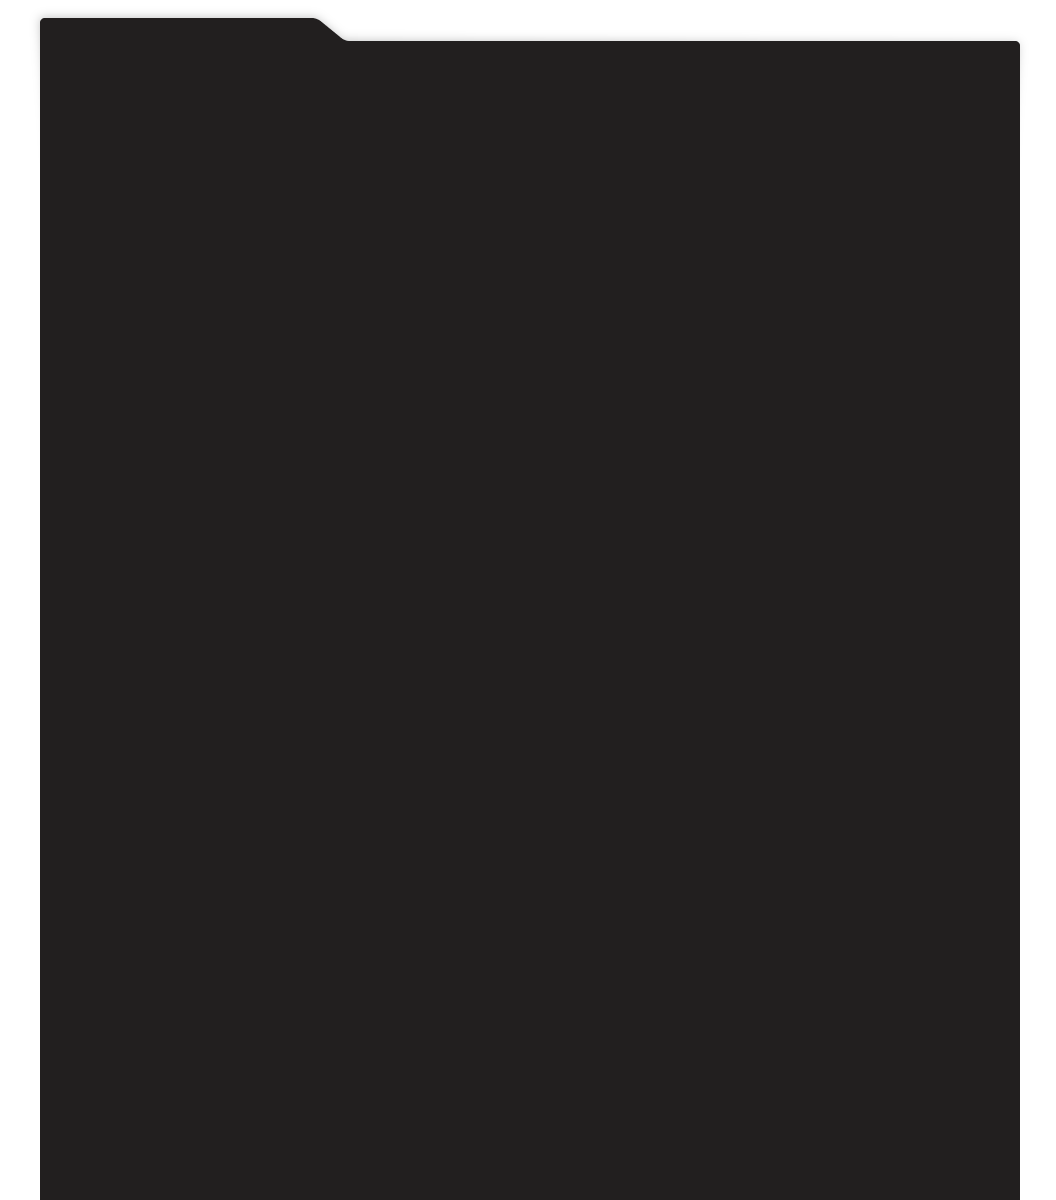
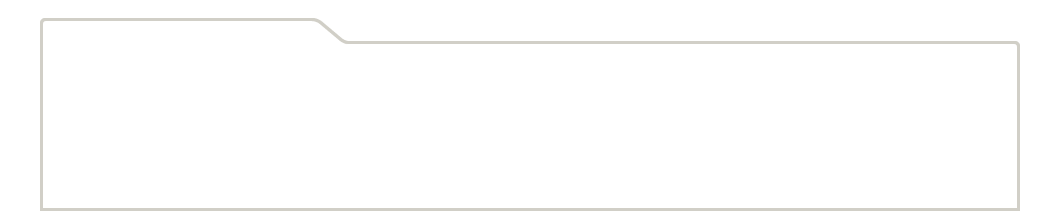
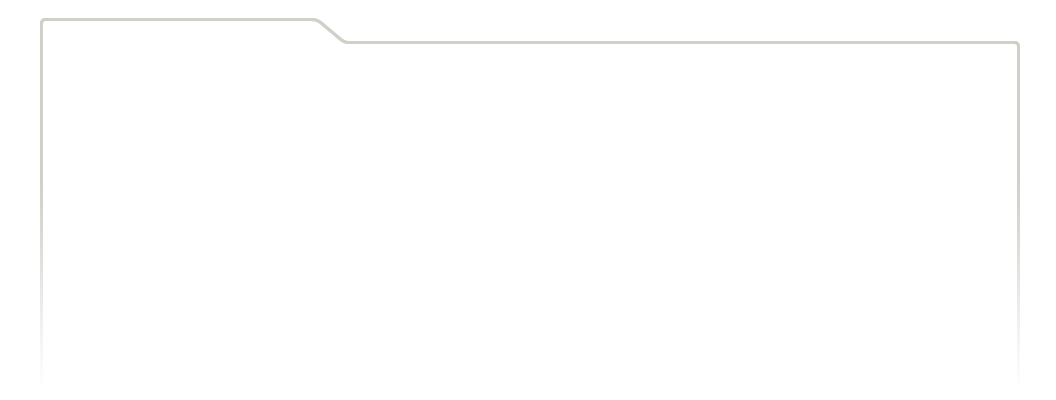
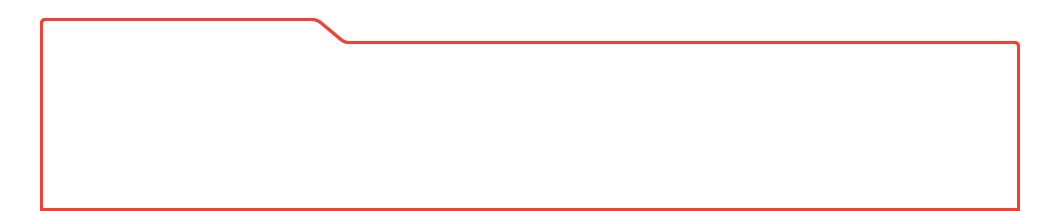
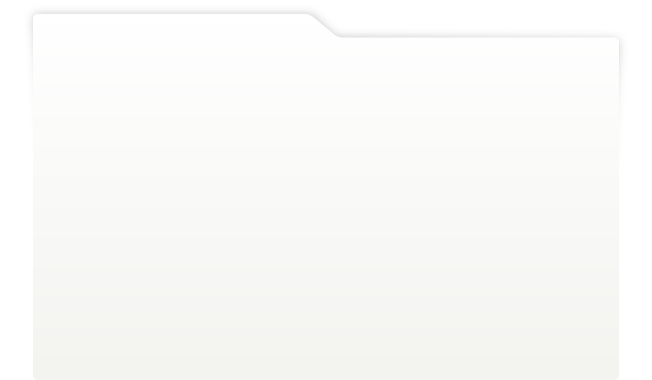
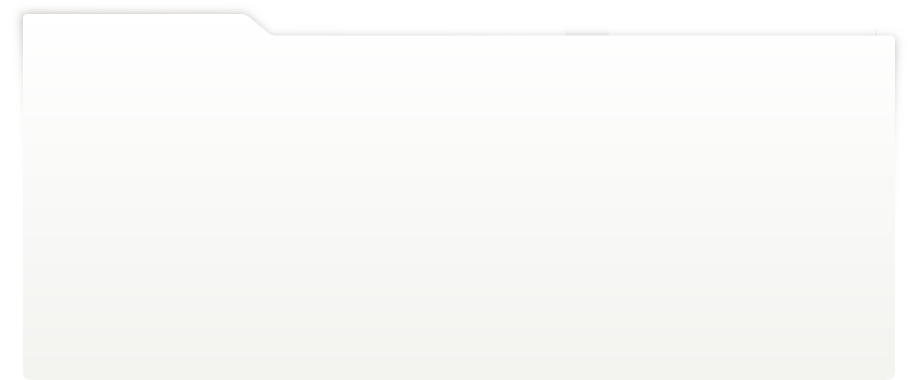
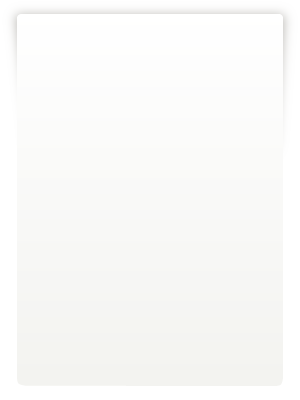
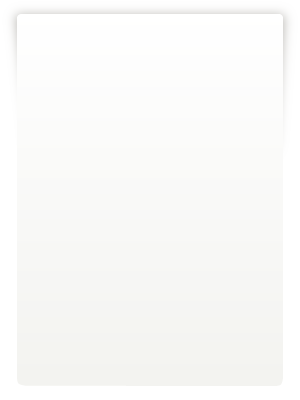
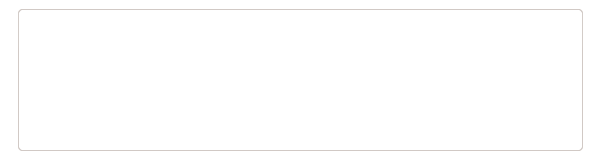
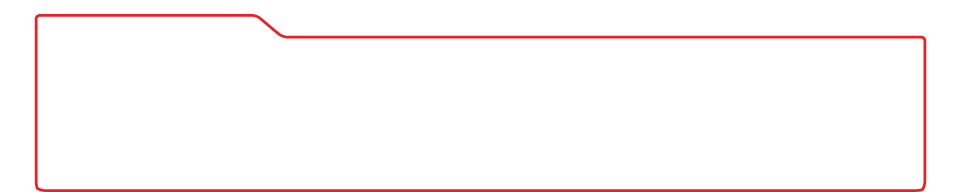
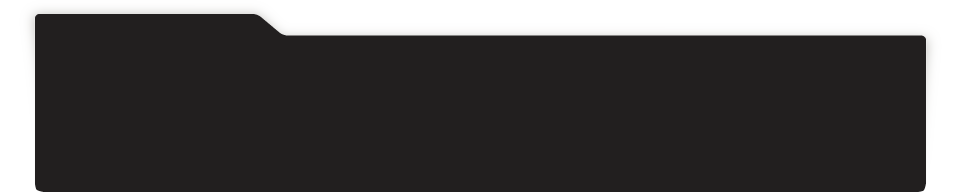
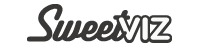
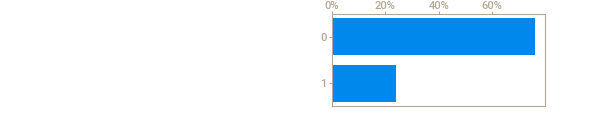
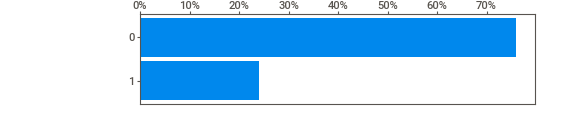
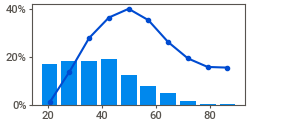
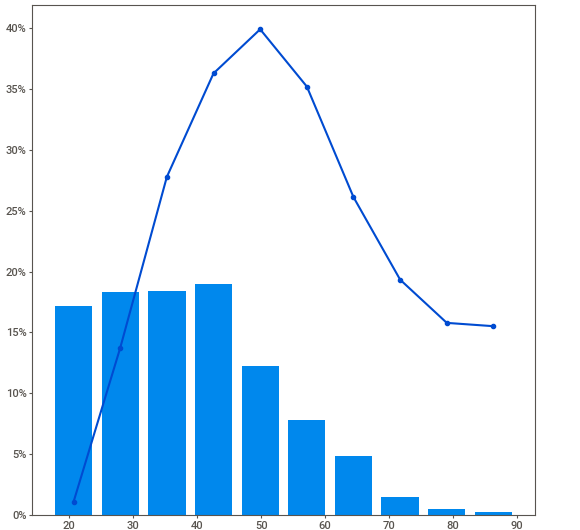
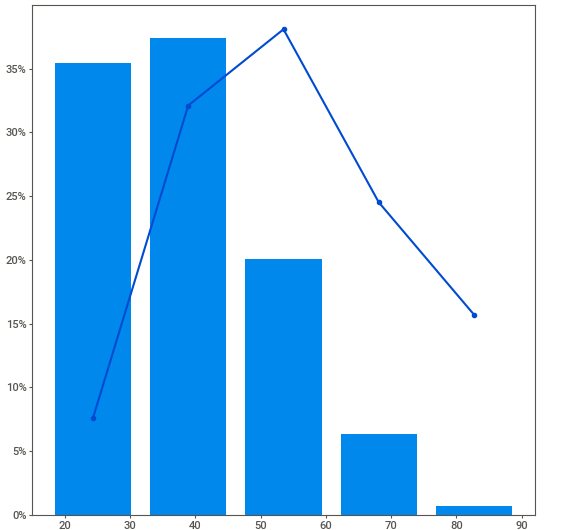
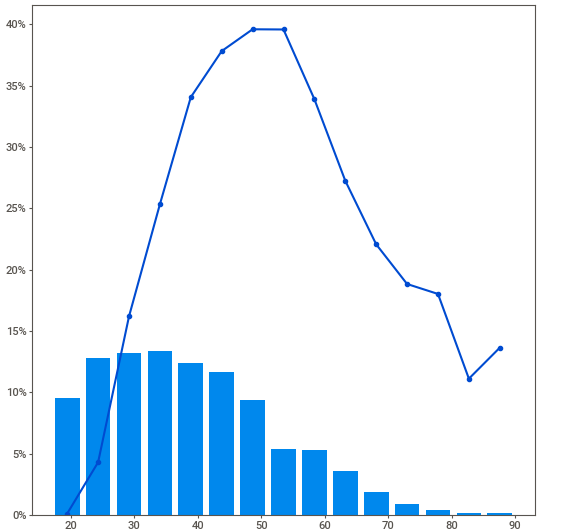
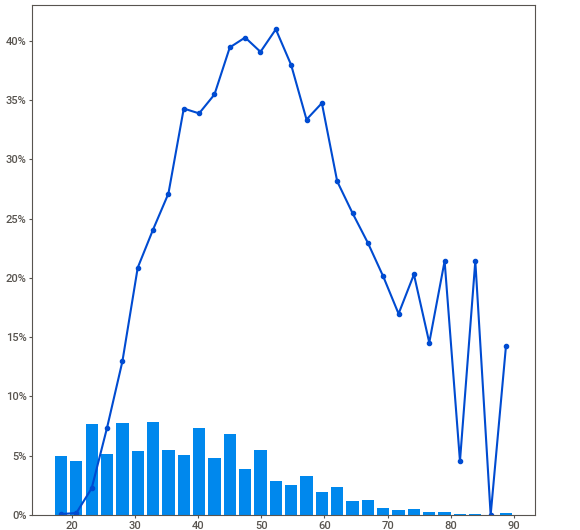
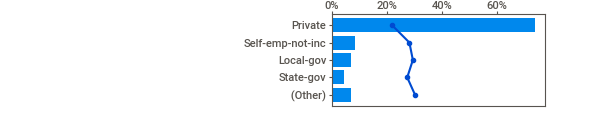
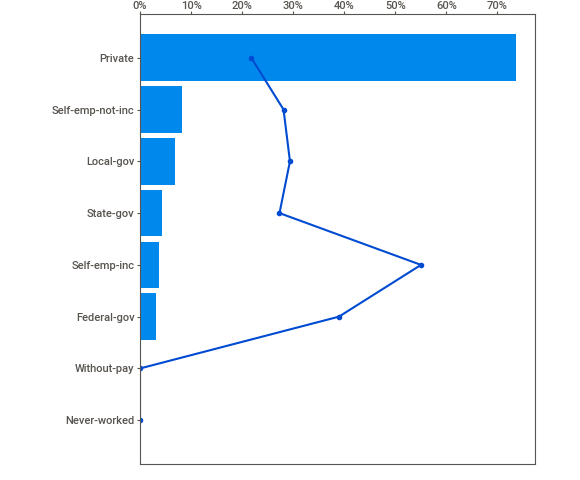
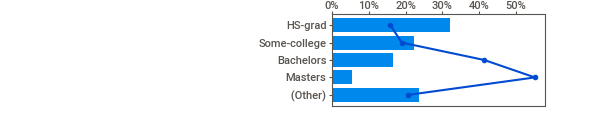
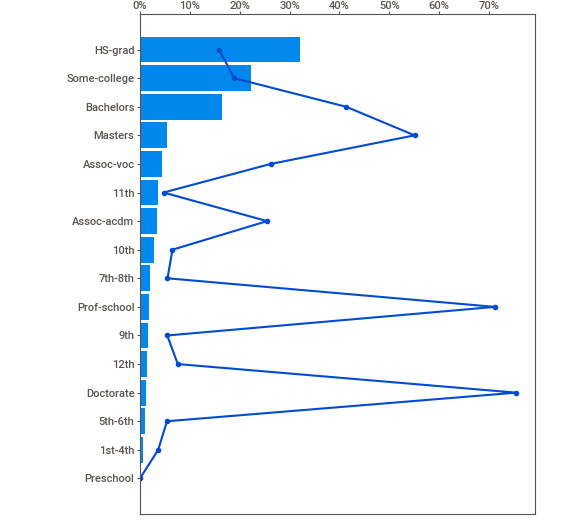
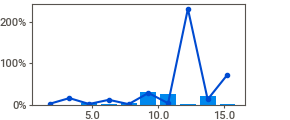
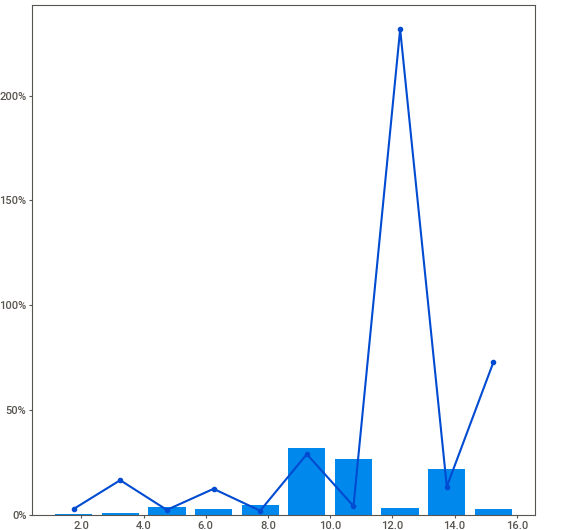
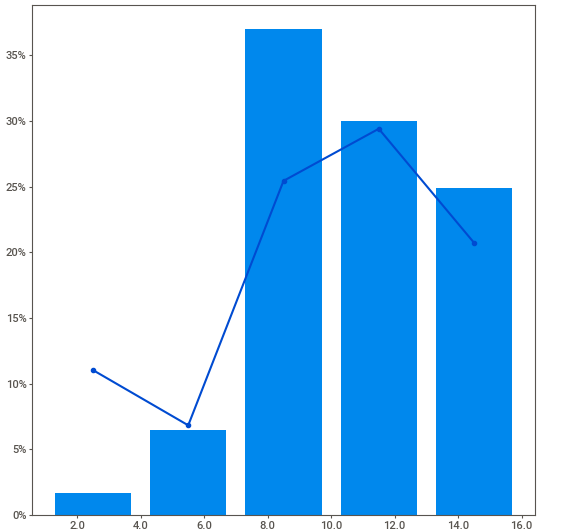
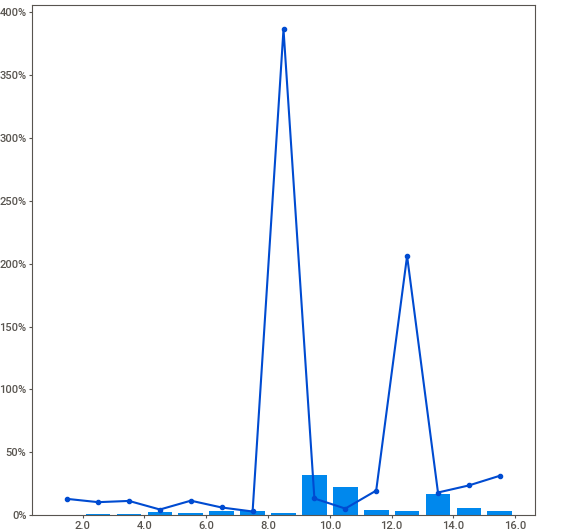
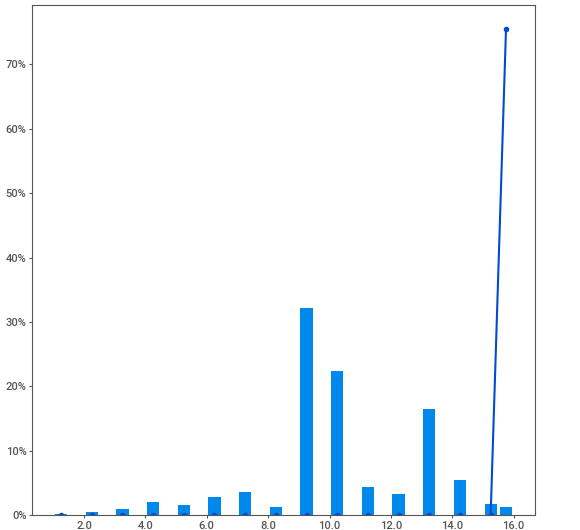
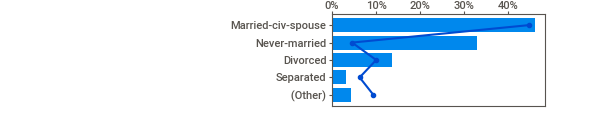
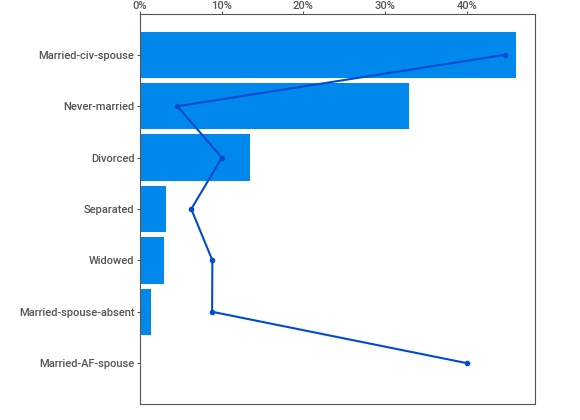
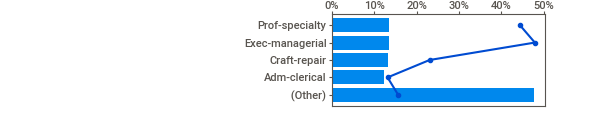
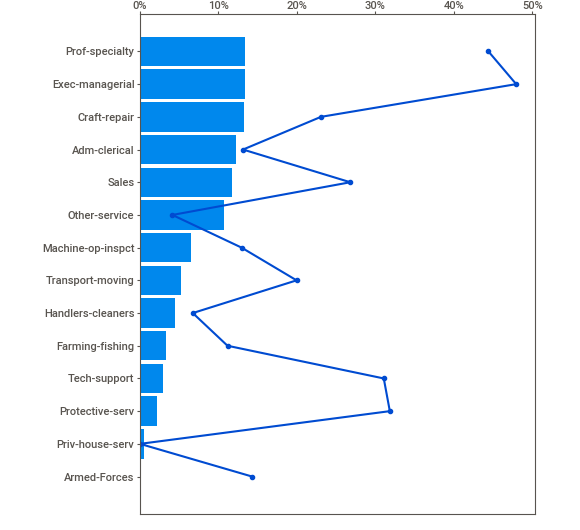
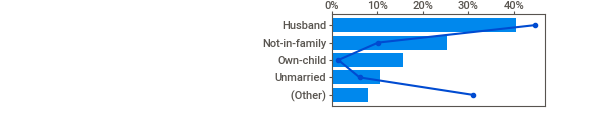
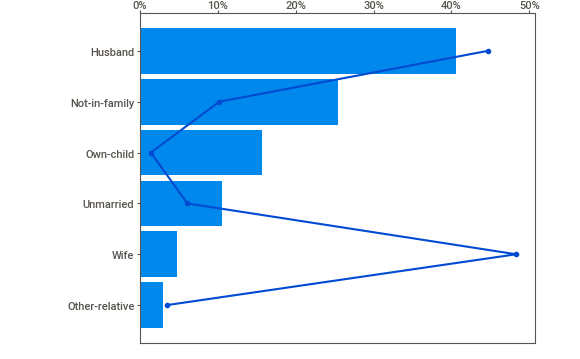
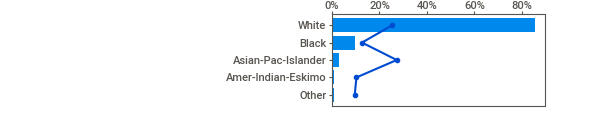
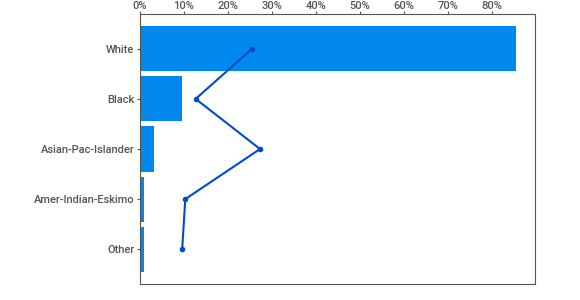
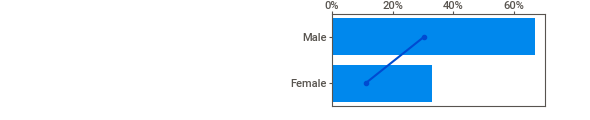
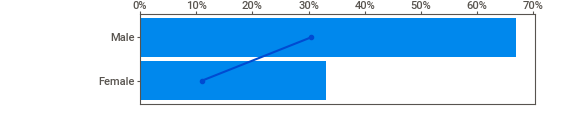
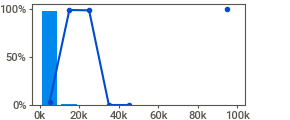
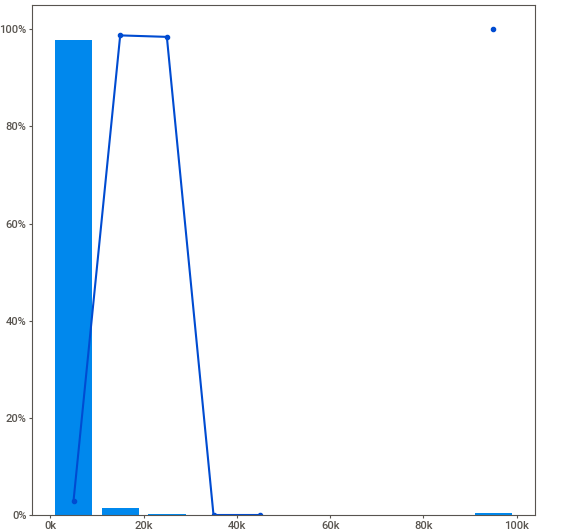
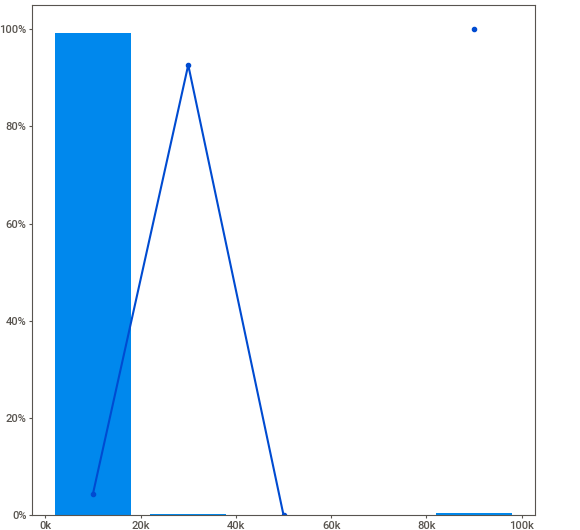
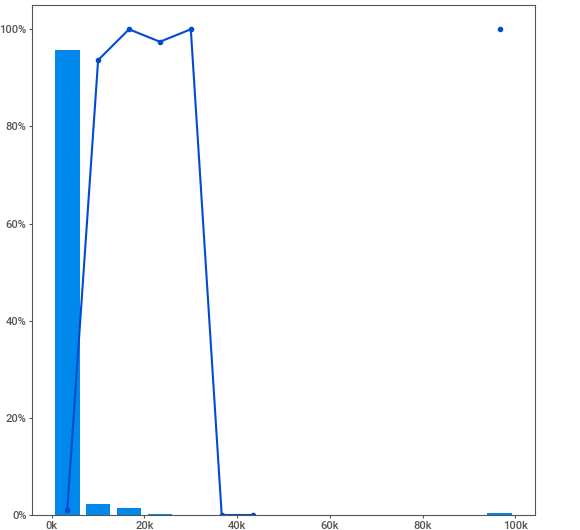
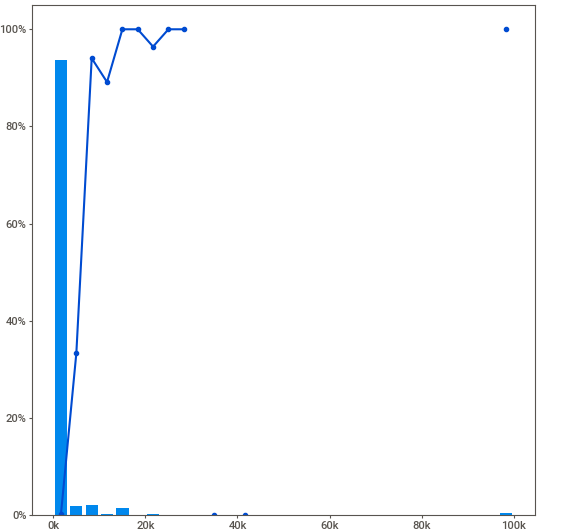
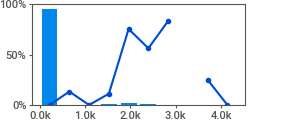
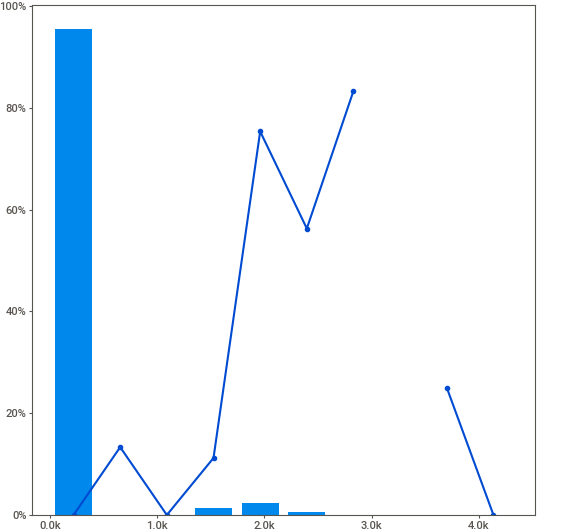
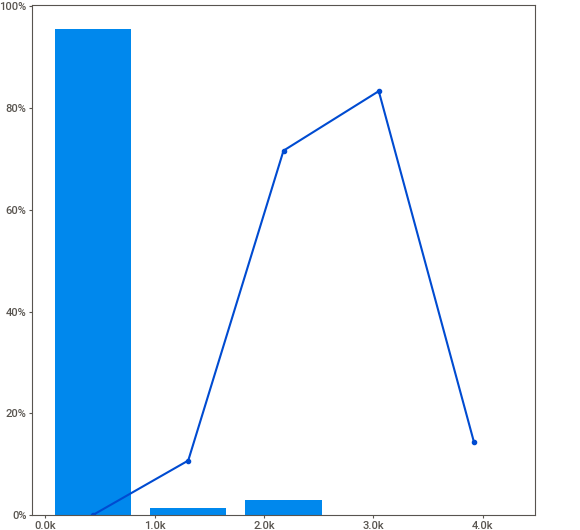
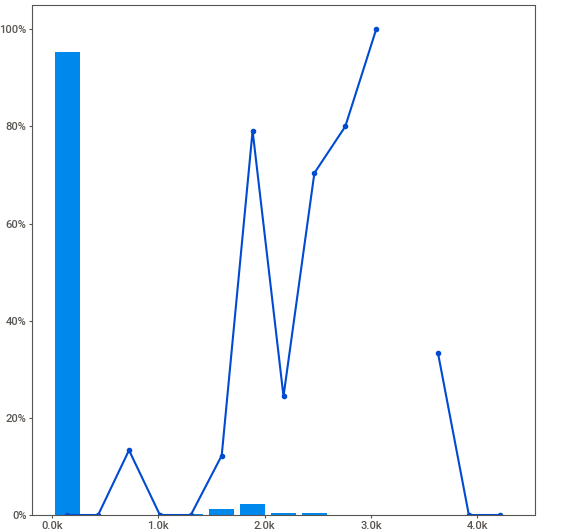
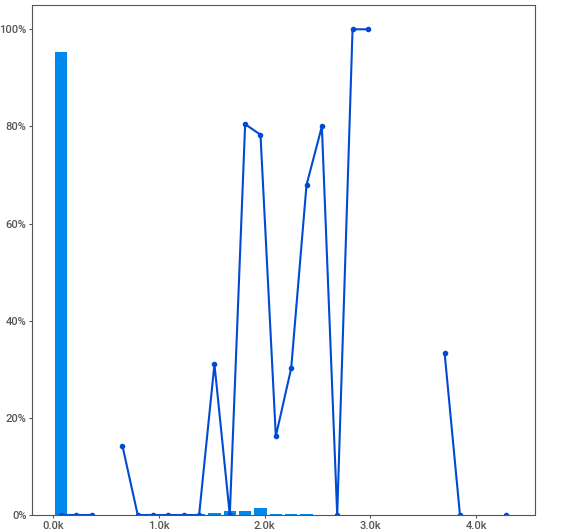
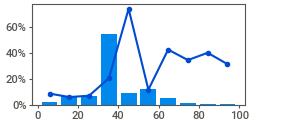
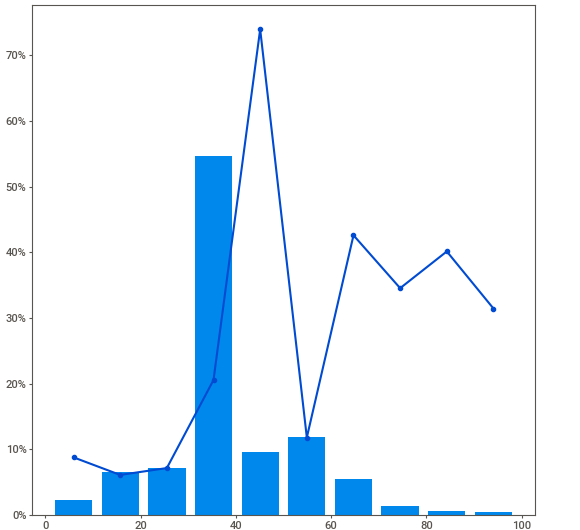
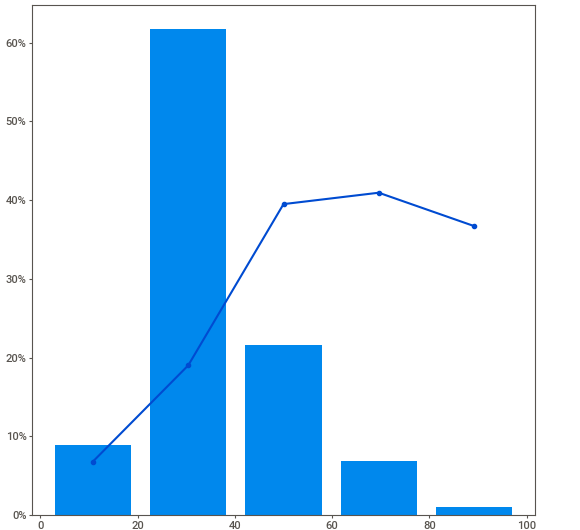
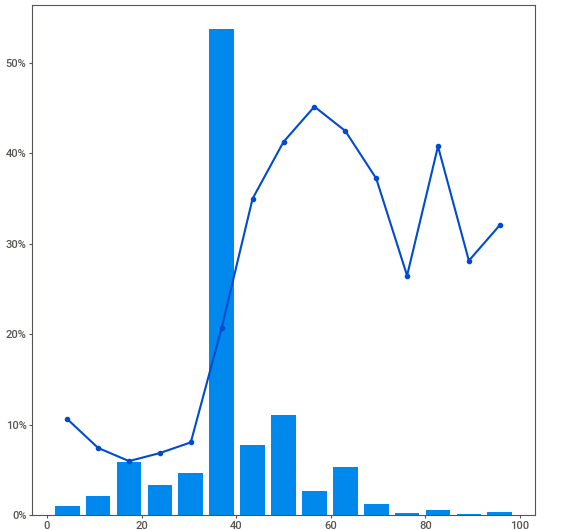
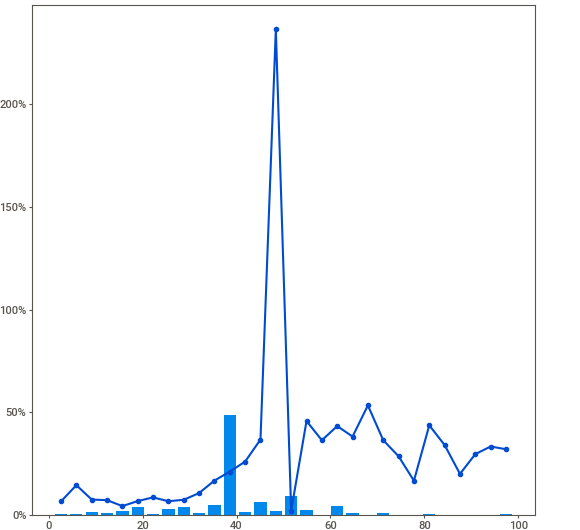
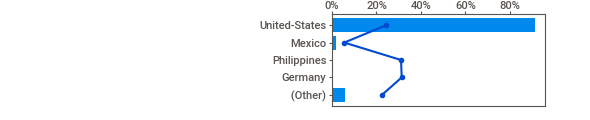
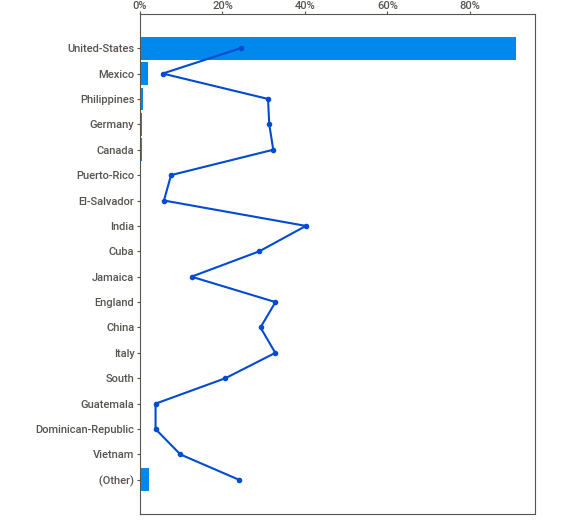
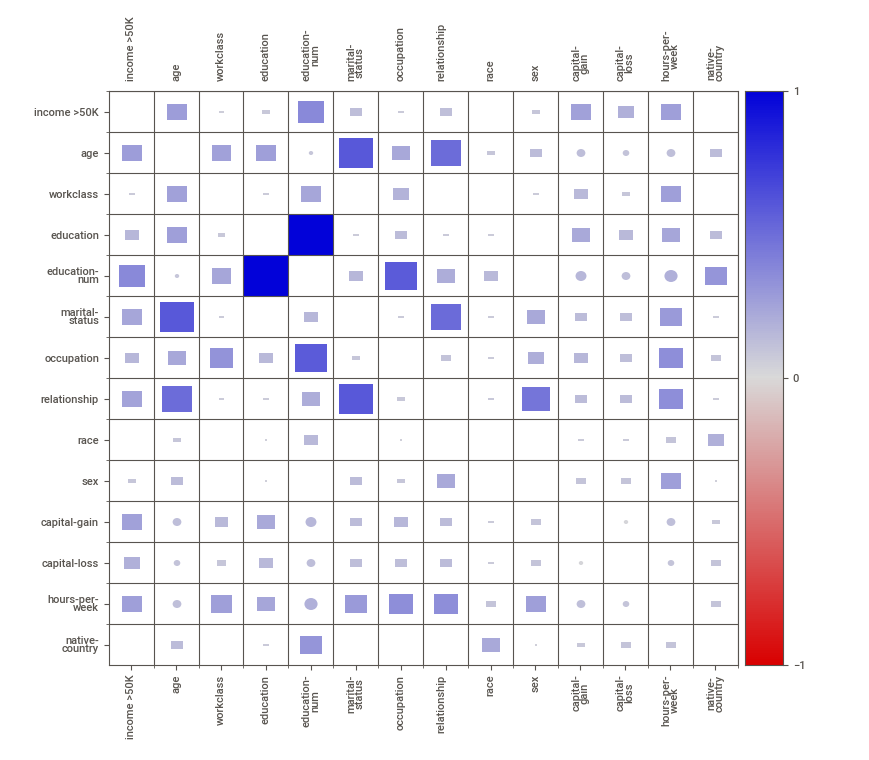
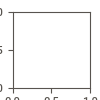

In [43]:
analyze_report = sv.analyze([train_df,'Train'], 'income >50K')
analyze_report.show_notebook(w=1000, h=500, scale=0.9)

- Analyze Report ScreenShot

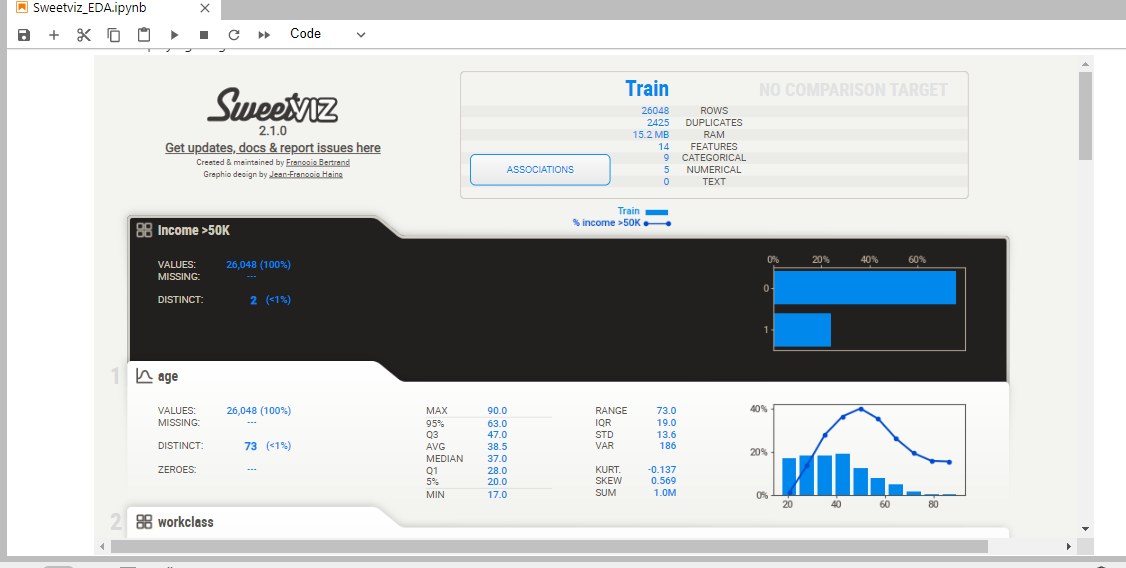

In [56]:
analyze_report.show_html(filepath='Analyze_Report.html', 
                         open_browser=False); # save a html file in your directory.

Report Analyze_Report.html was generated.


## 2. compare() method
Use this version when you have 2 data sets to compare together (e.g. Train versus Test)

                                             |                                             | [  0%]   00:00 ->…


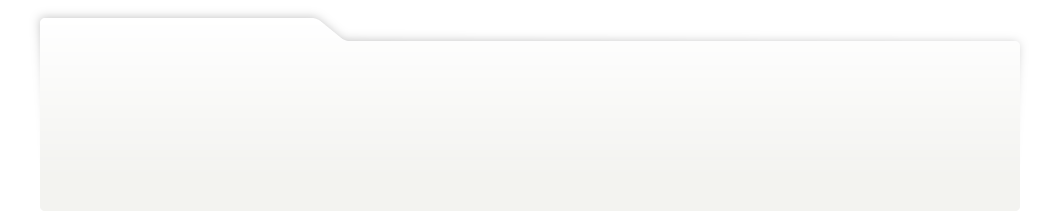
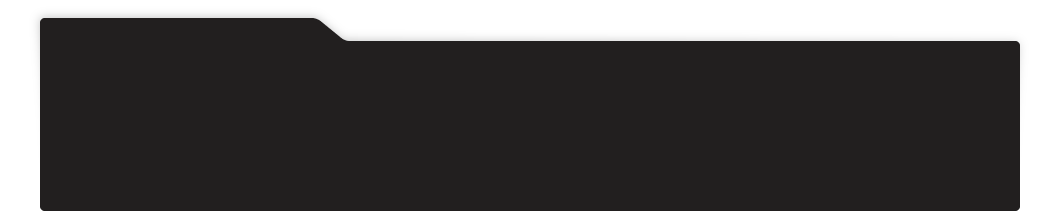
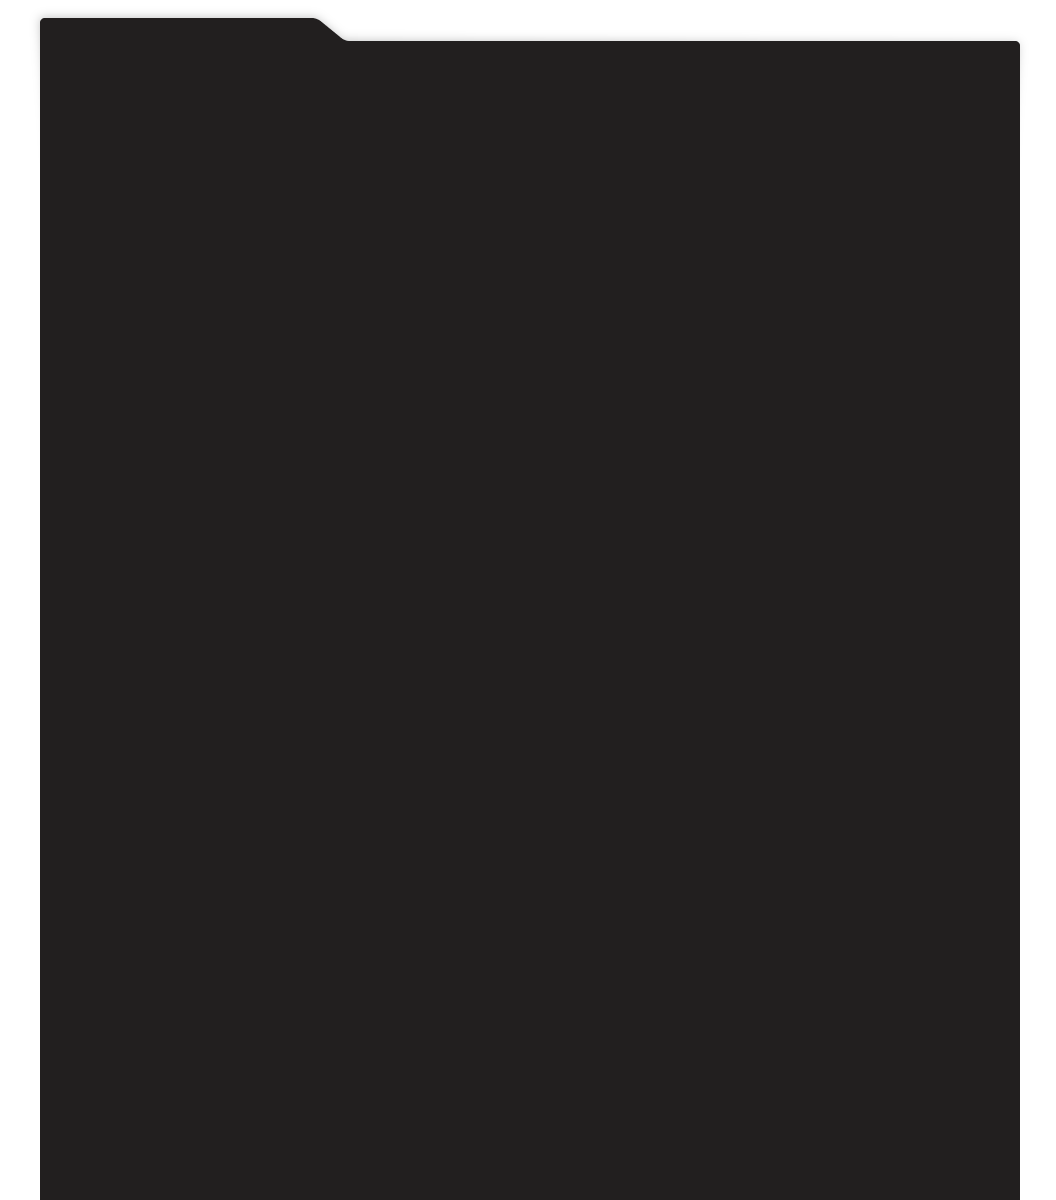
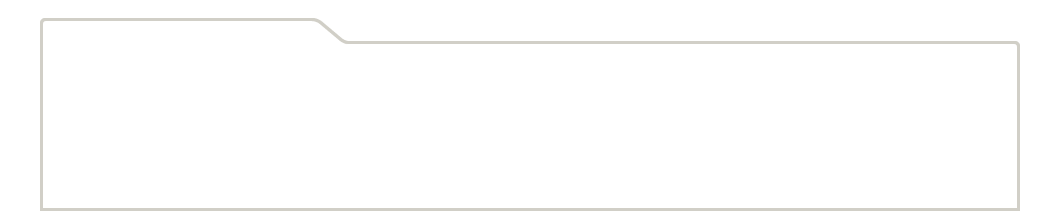
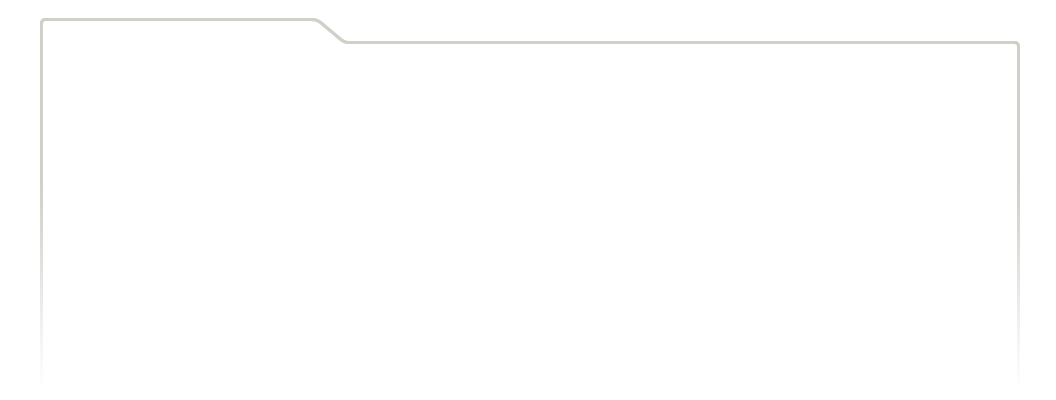
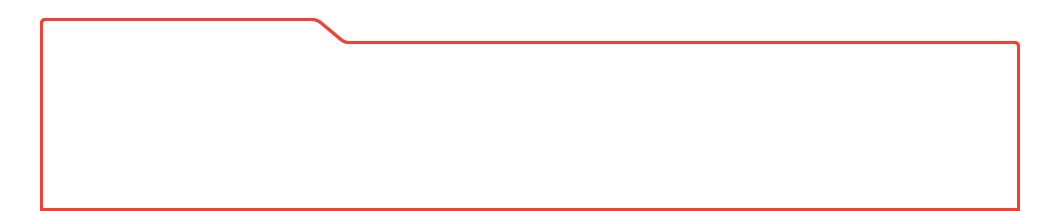
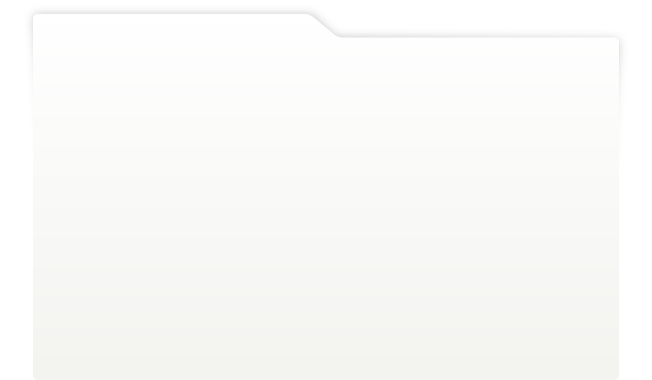
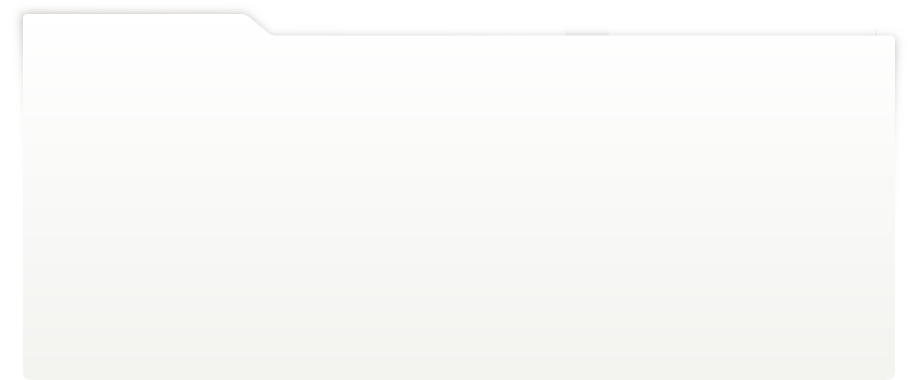
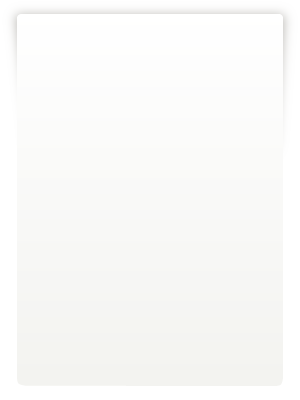
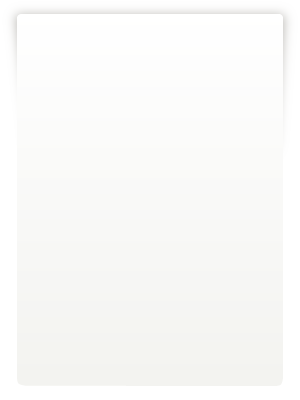
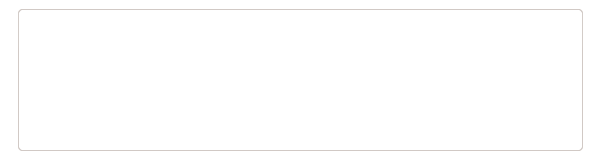
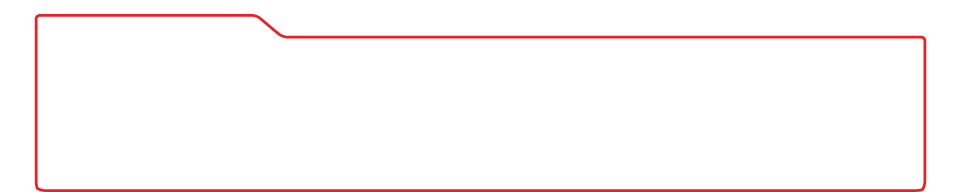
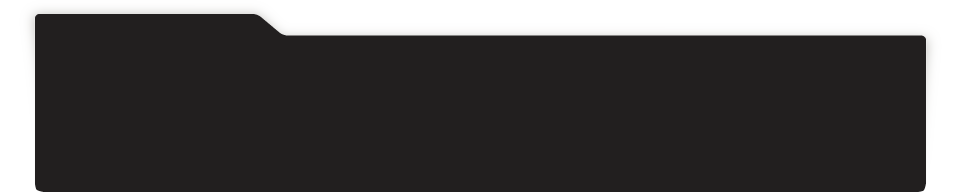
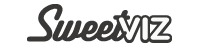
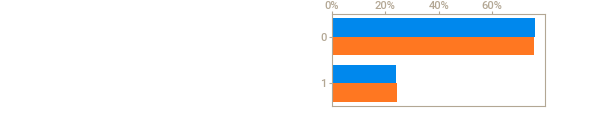
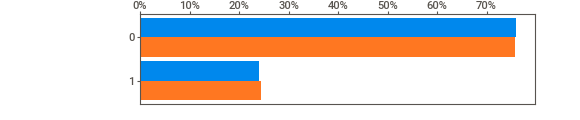
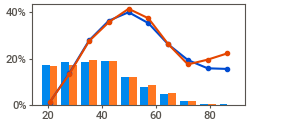
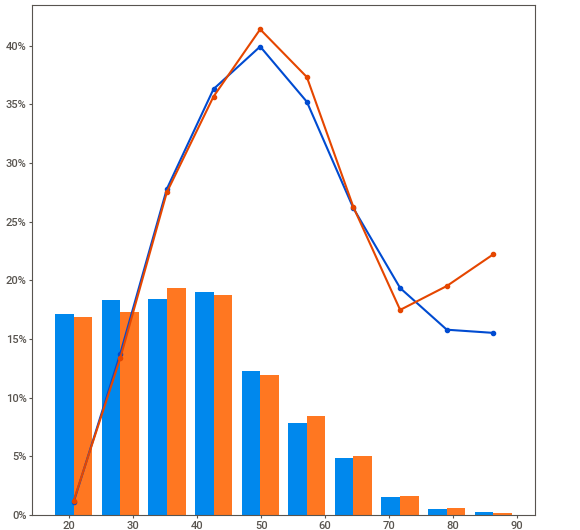
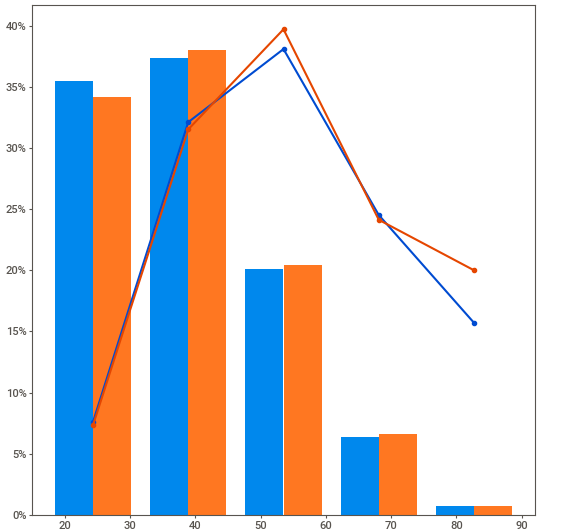
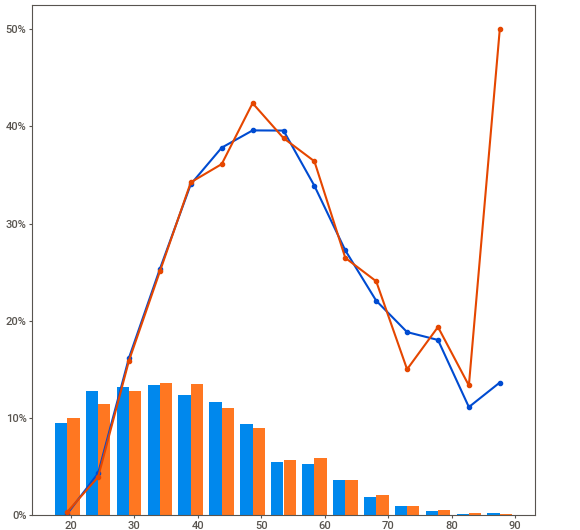
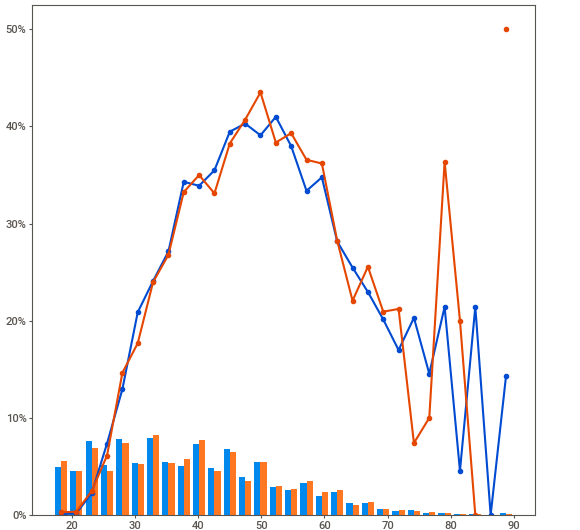
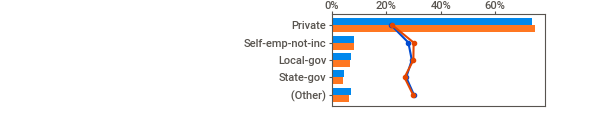
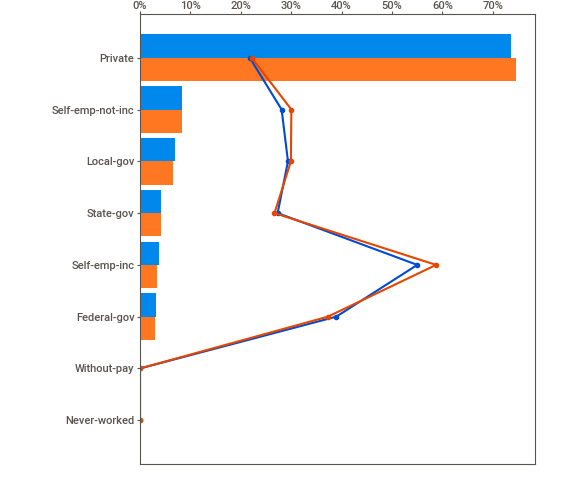
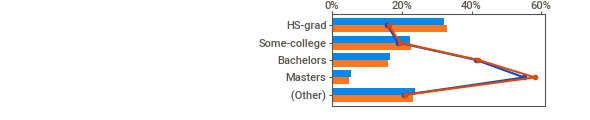
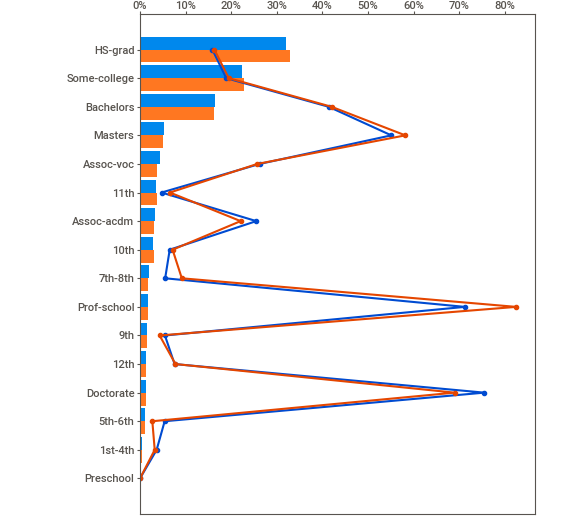
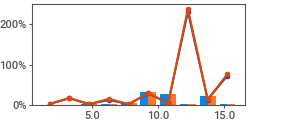
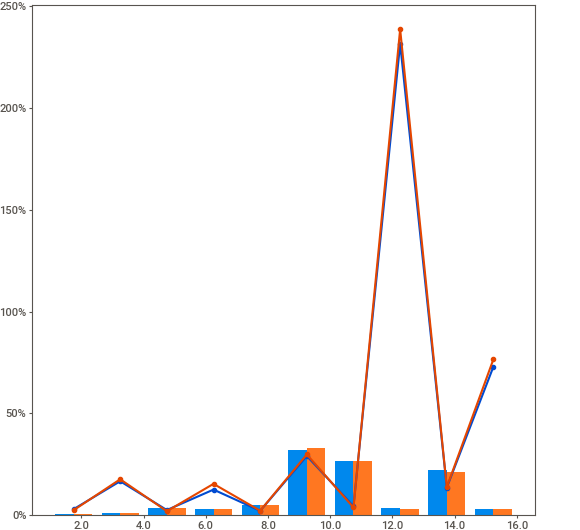
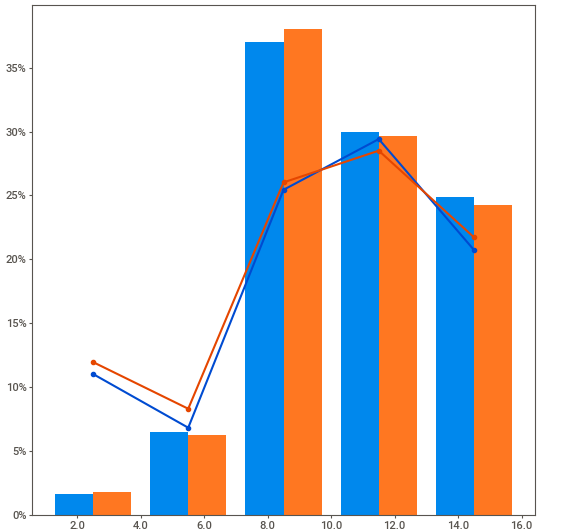
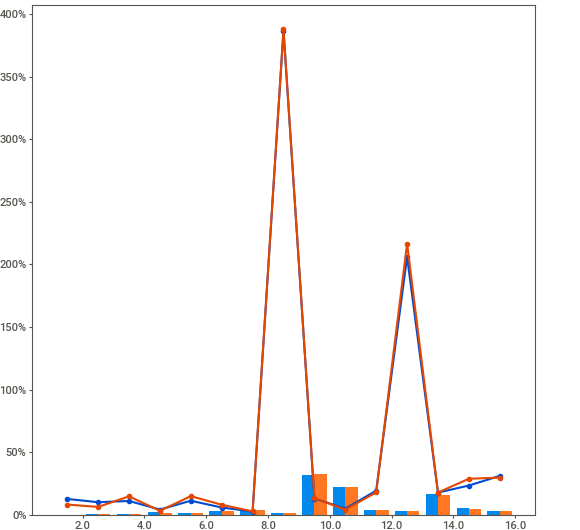
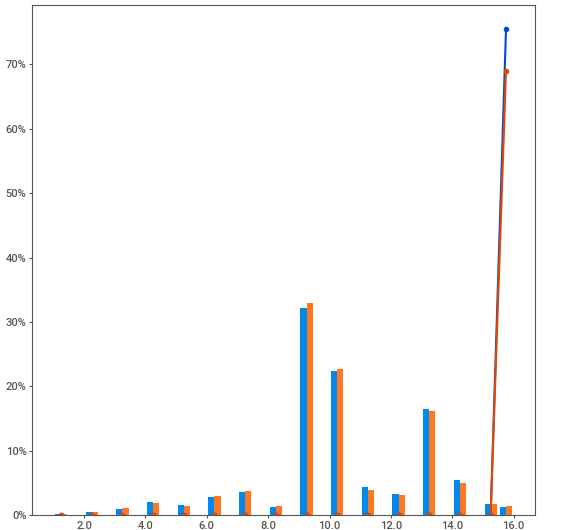
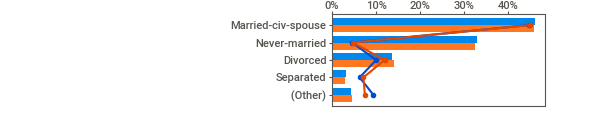
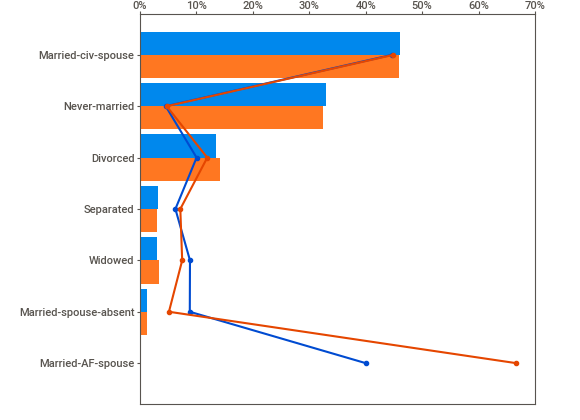
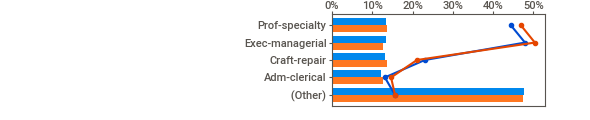
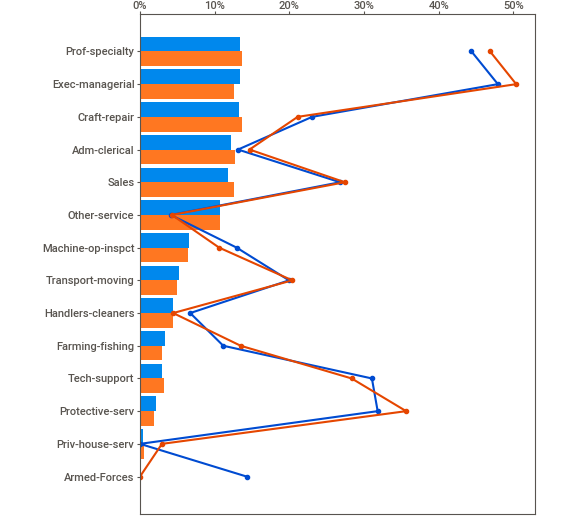
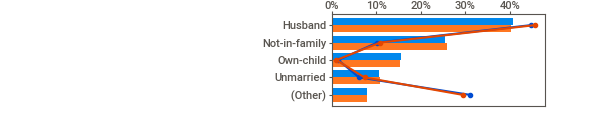
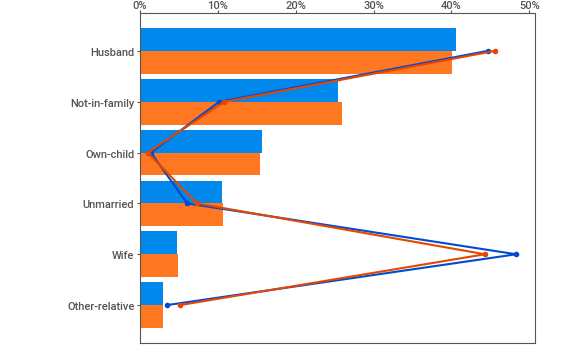
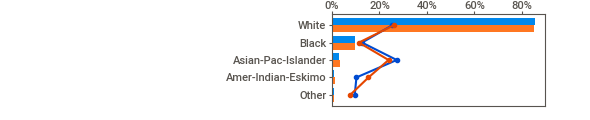
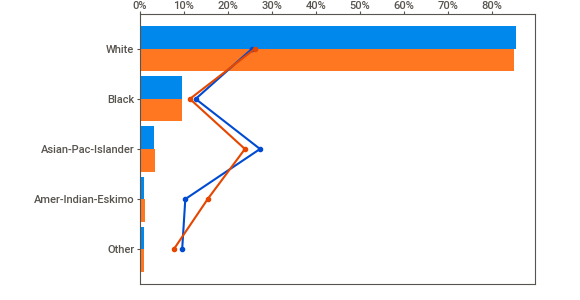
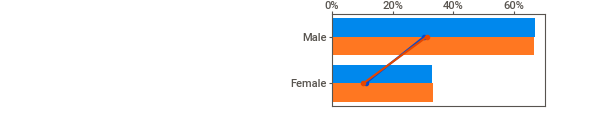
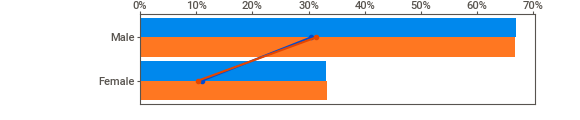
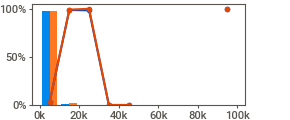
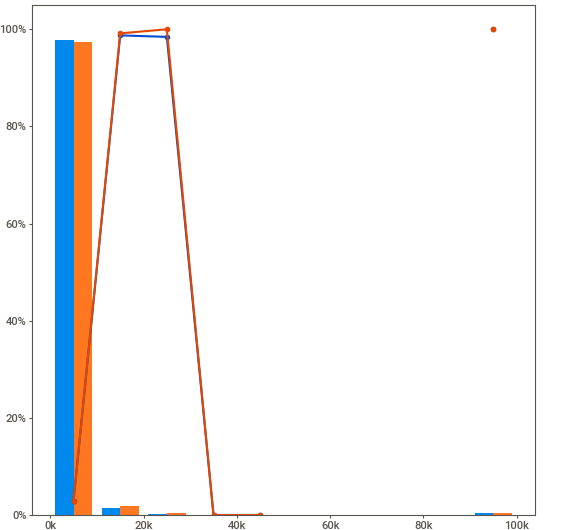
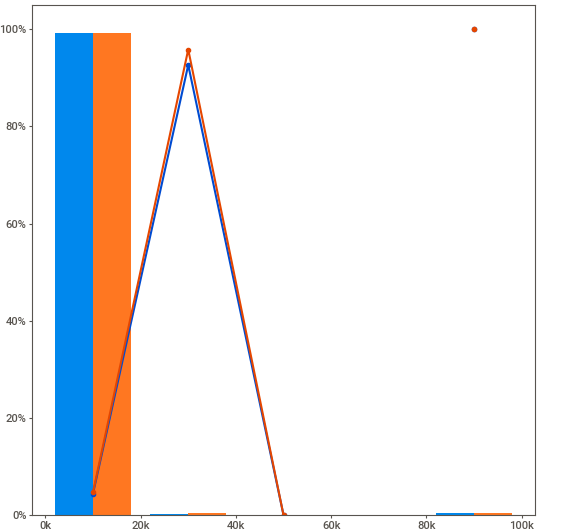
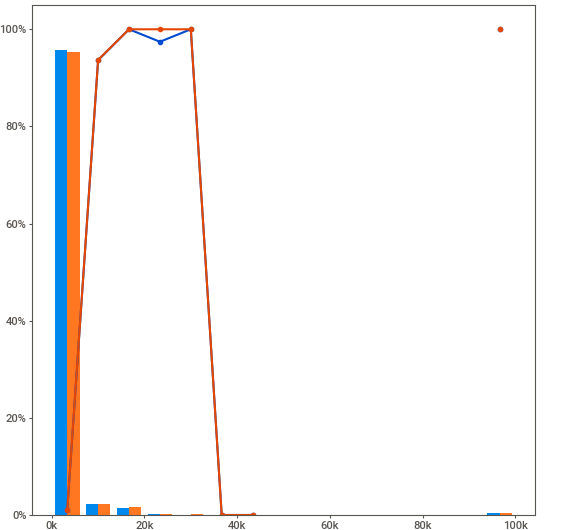
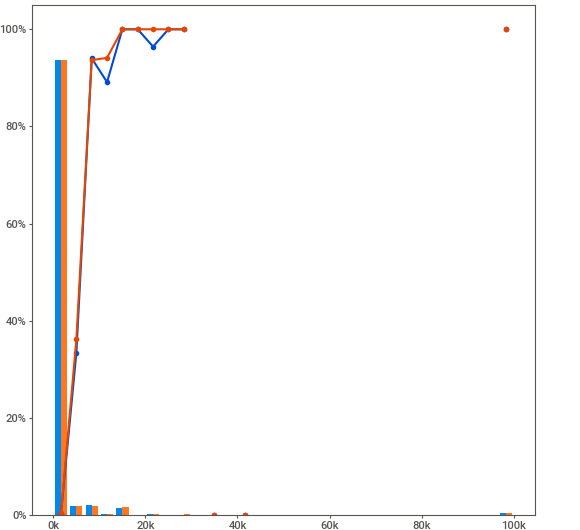
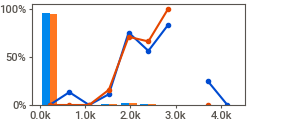
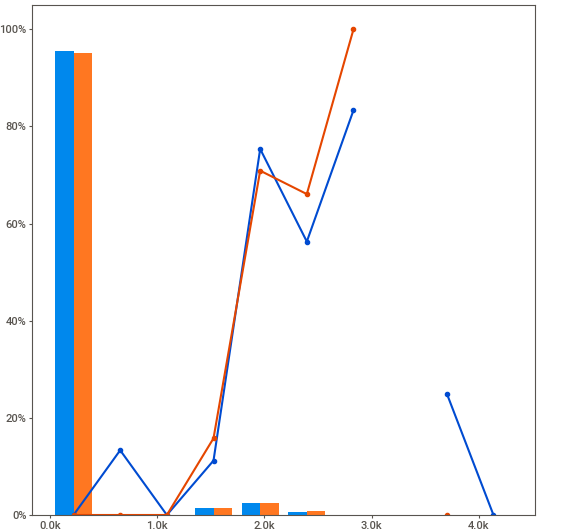
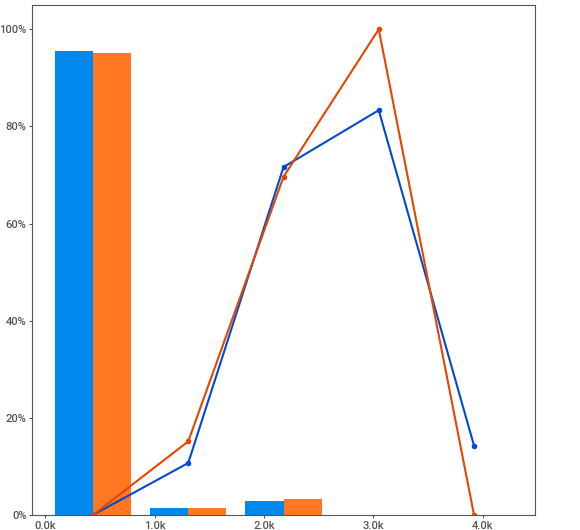
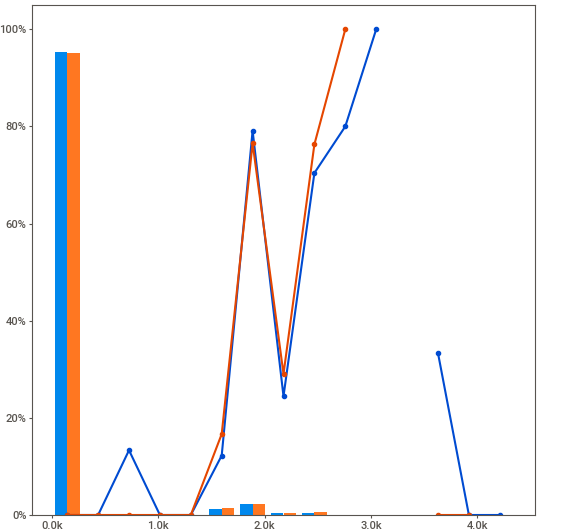
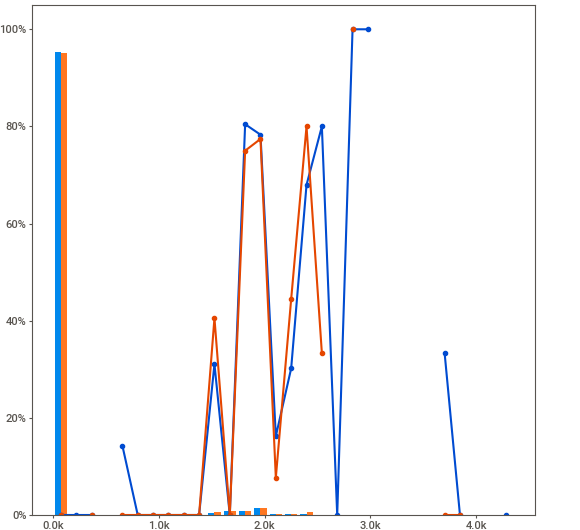
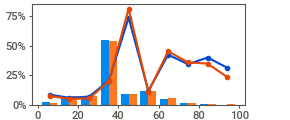
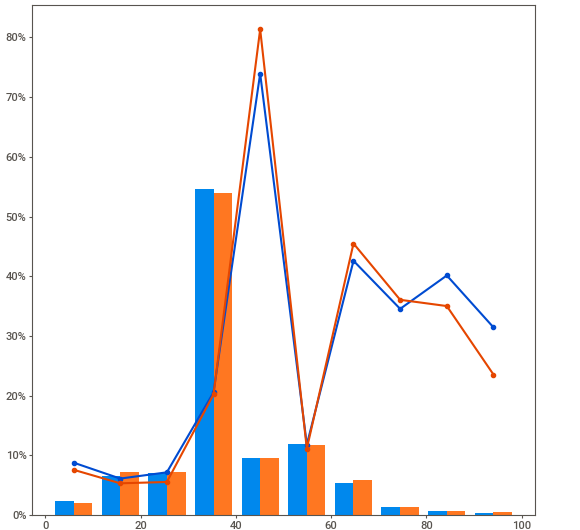
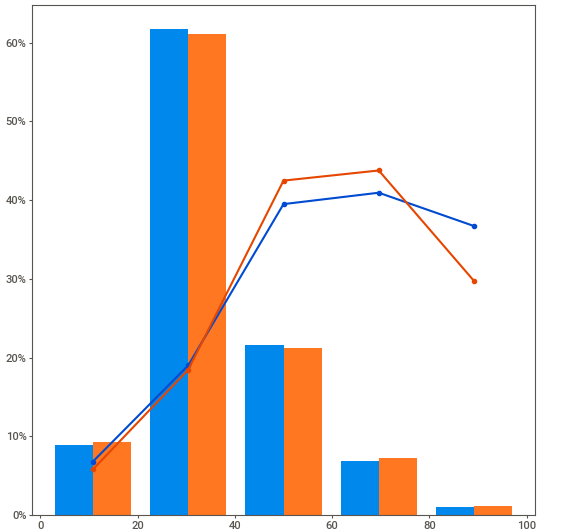
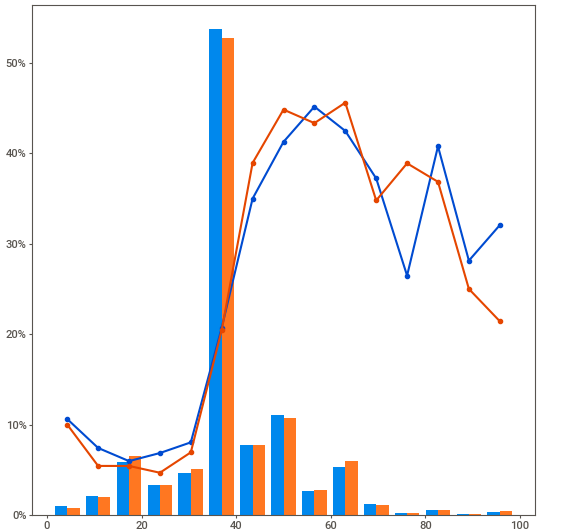
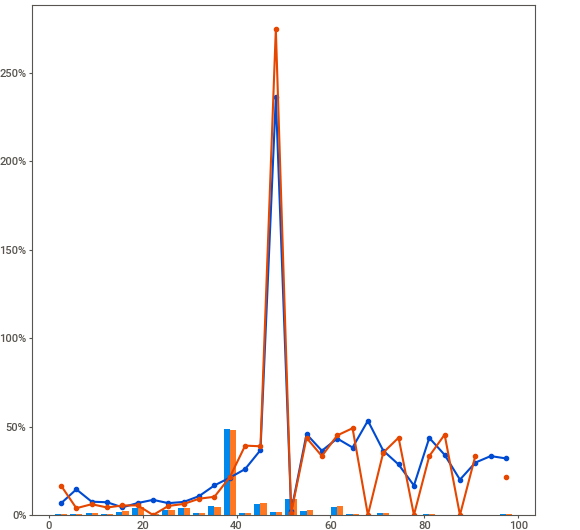
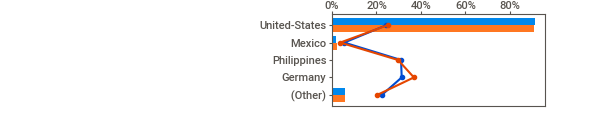
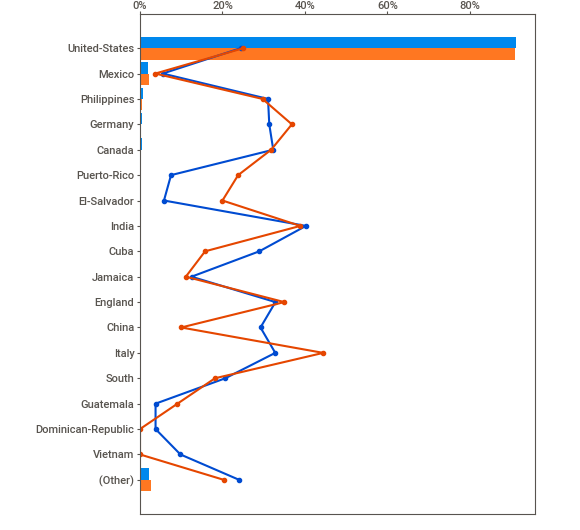
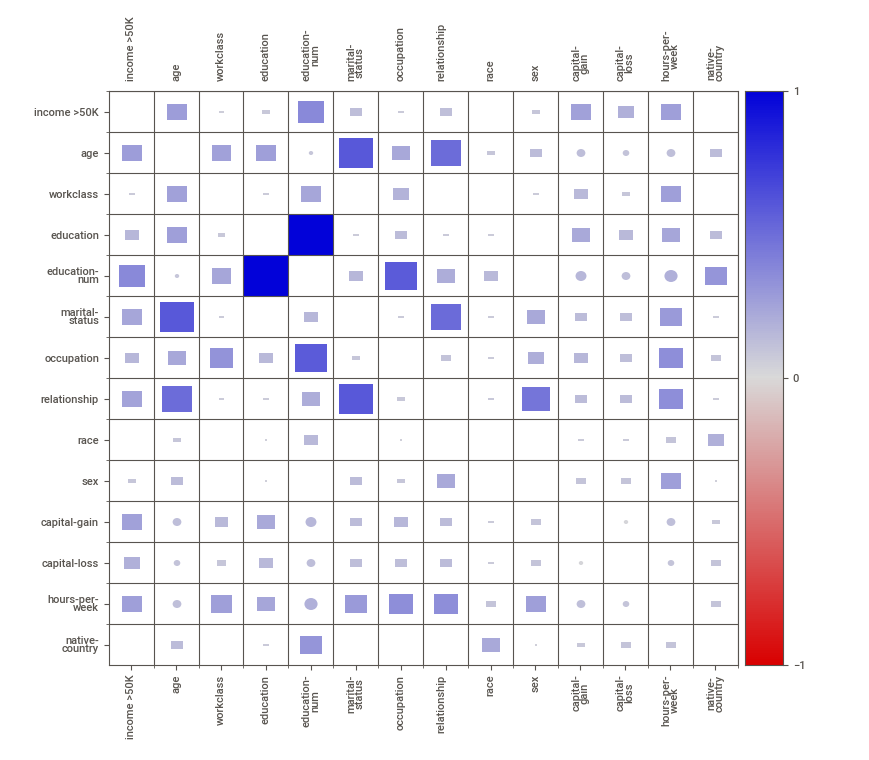
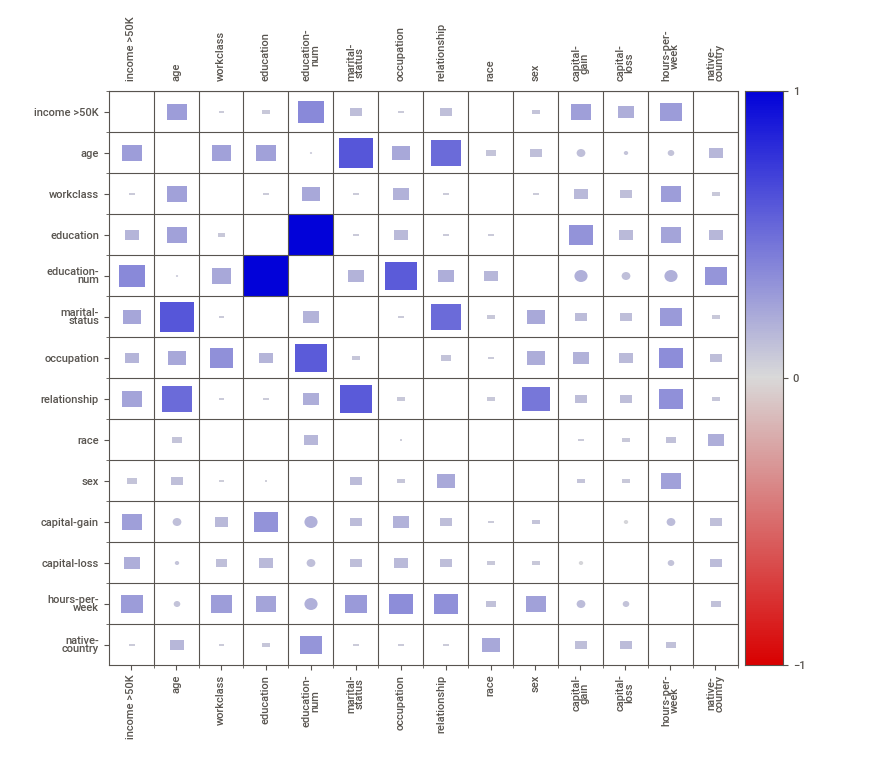

In [48]:
comparison_report = sv.compare([train_df,'Train'], [test_df,'Test'], target_feat='income >50K')
comparison_report.show_notebook(w=1000, h=500, scale=0.9)

- Comparison Report Screenshot

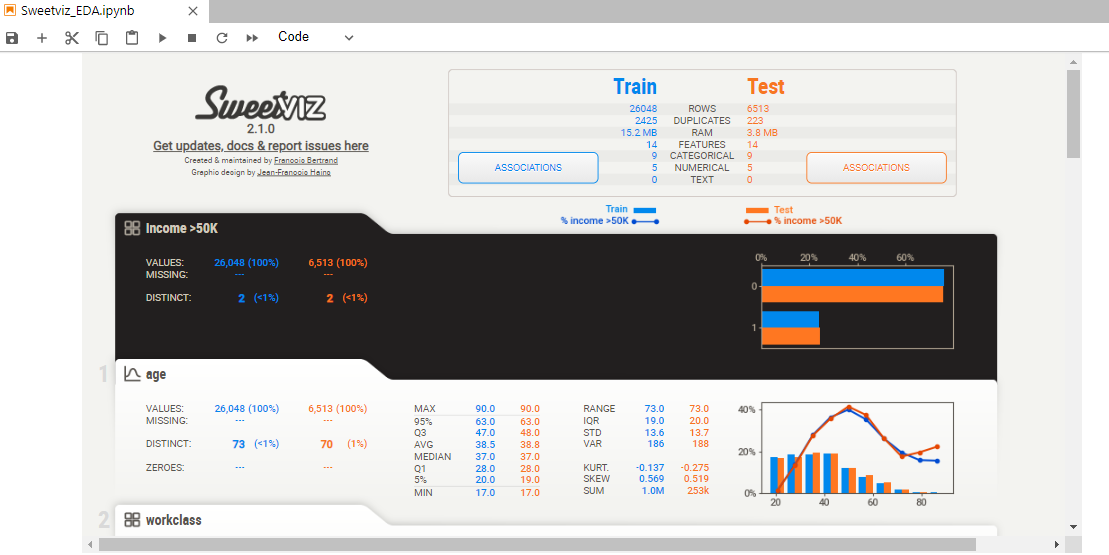

In [49]:
comparison_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 3. compare_intra() method
Use this when you want to compare 2 some populations within the same dataset. This is also a very useful report, especially when coupled with target feature analysis!

                                             |                                             | [  0%]   00:00 ->…


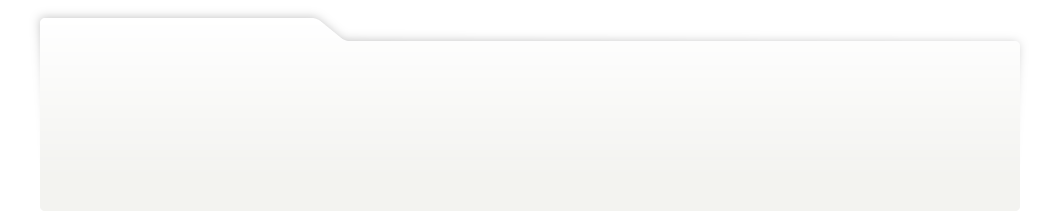
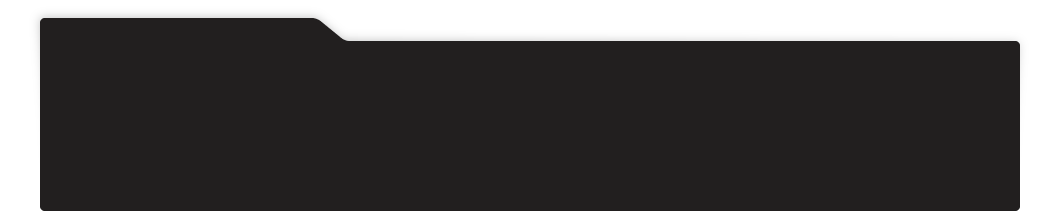
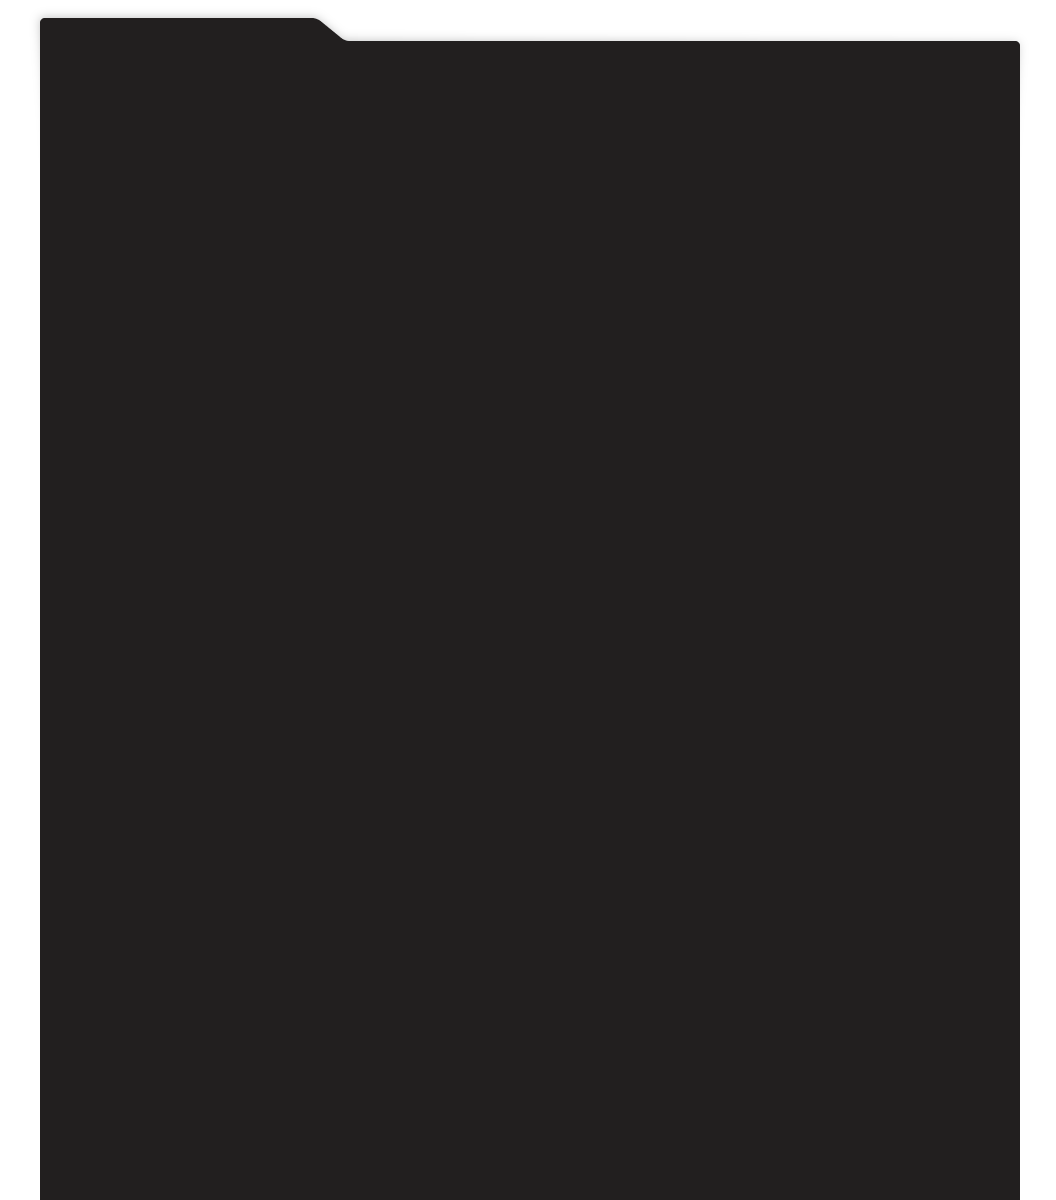
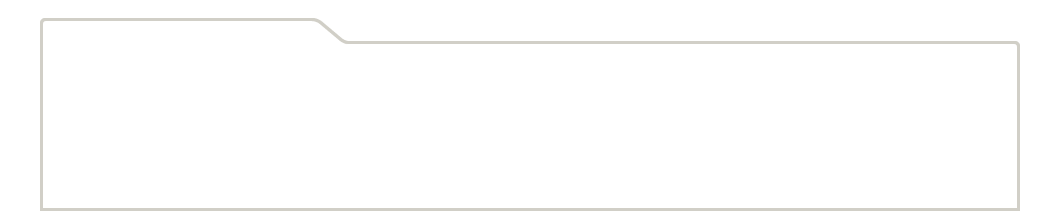
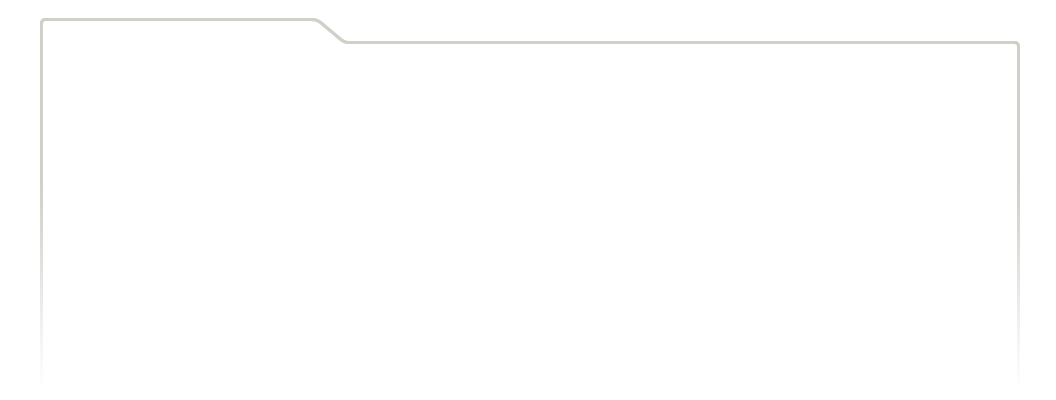
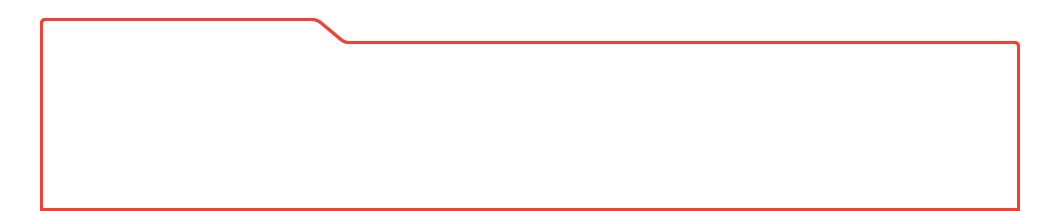
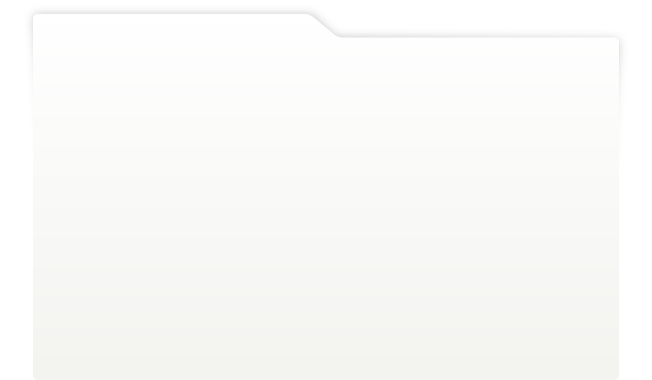
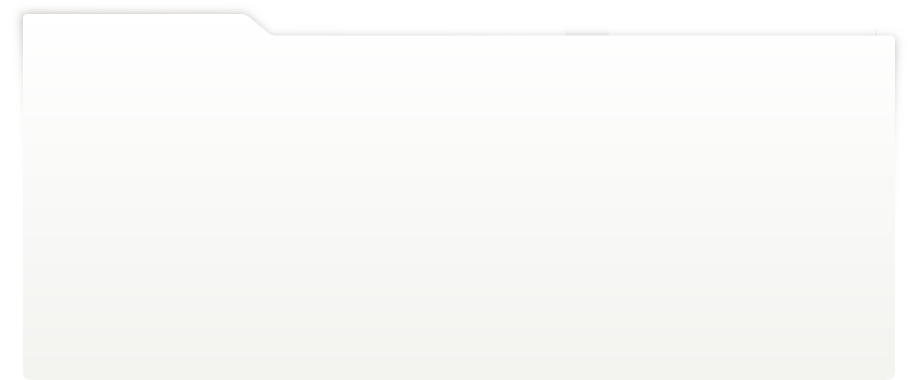
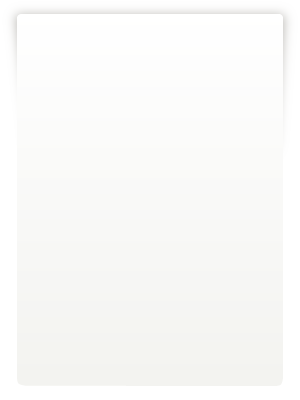
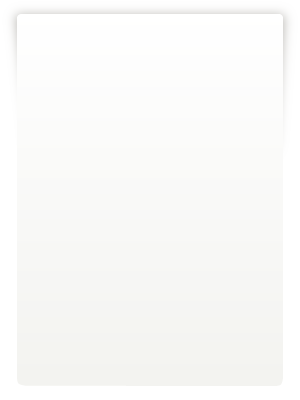
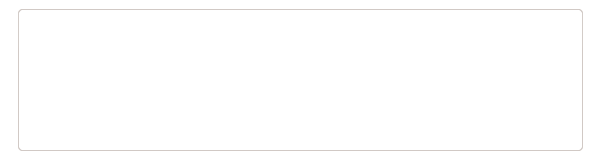
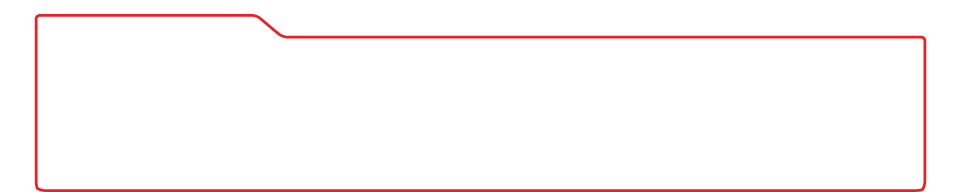
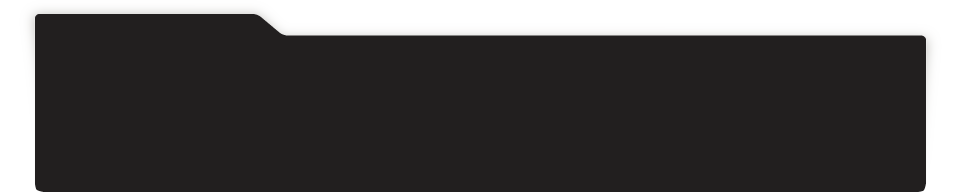
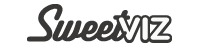
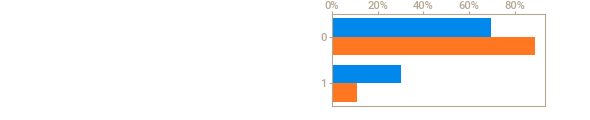
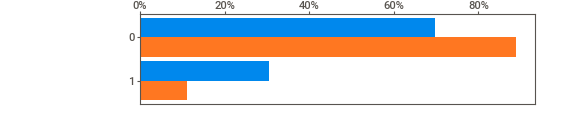
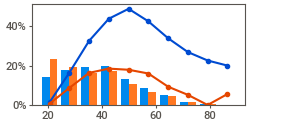
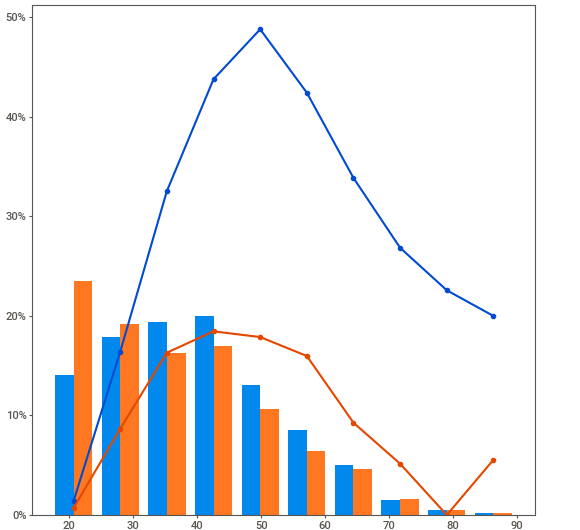
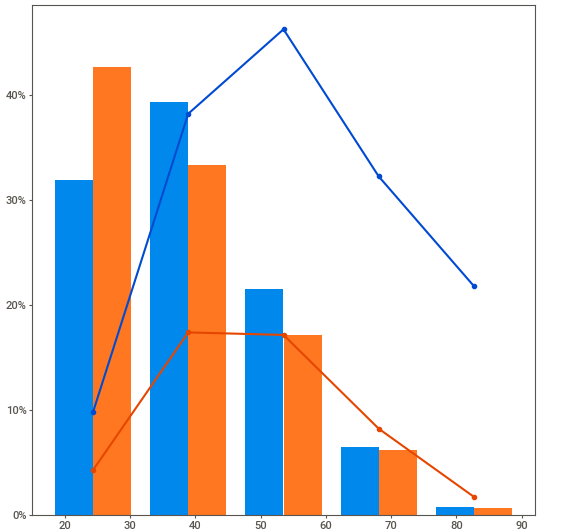
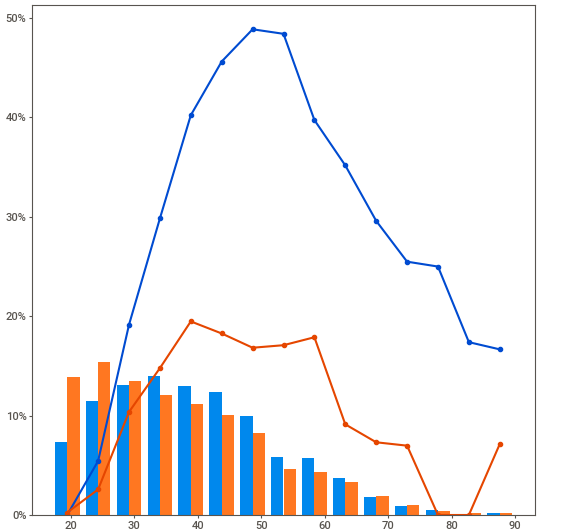
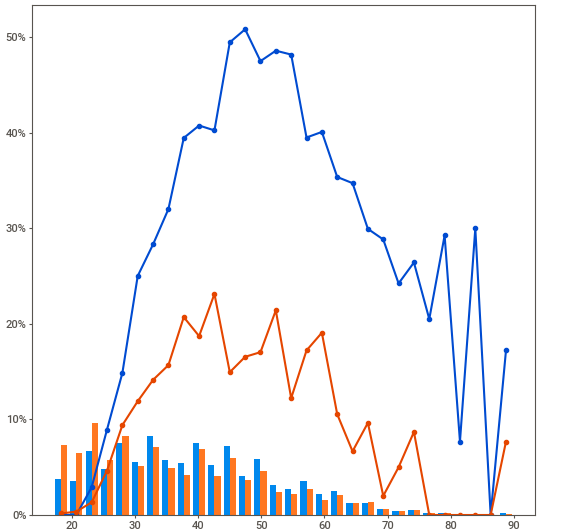
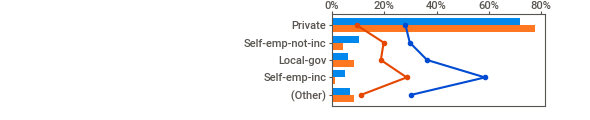
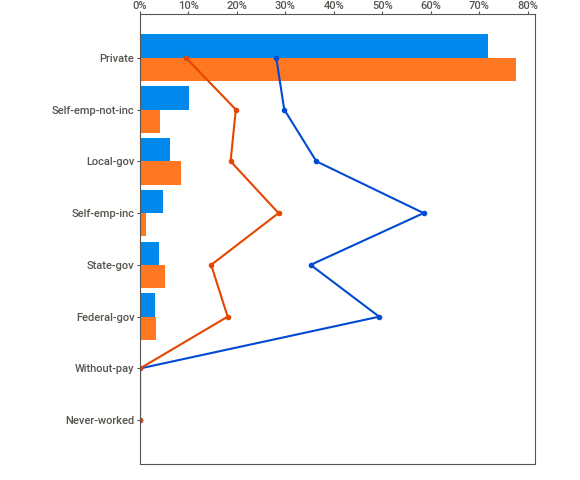
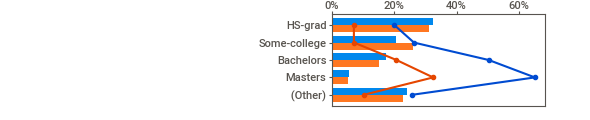
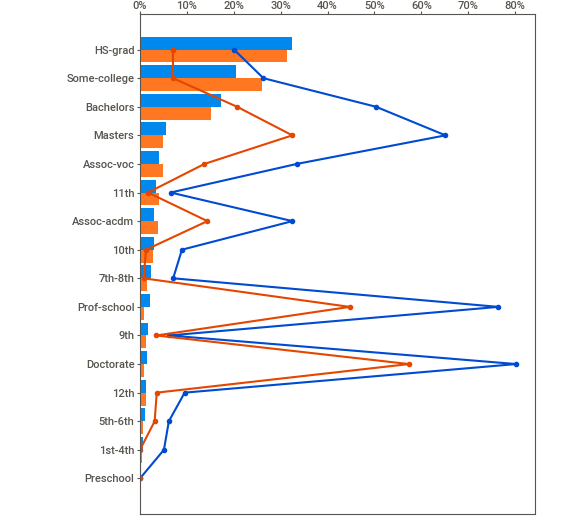
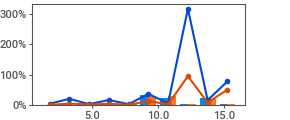
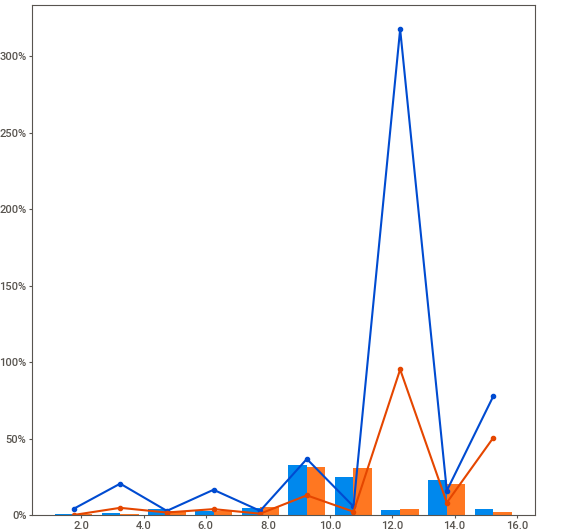
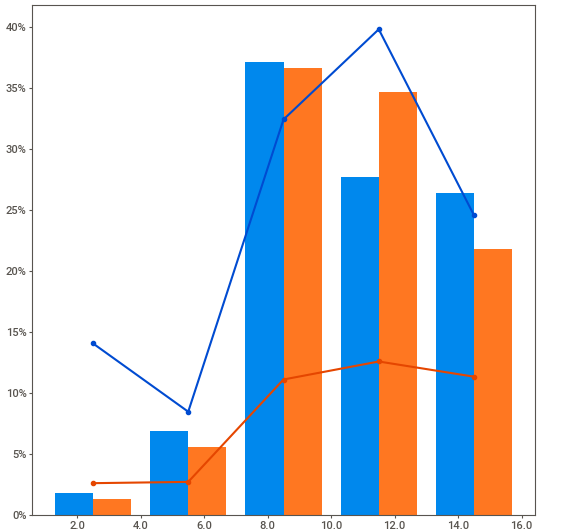
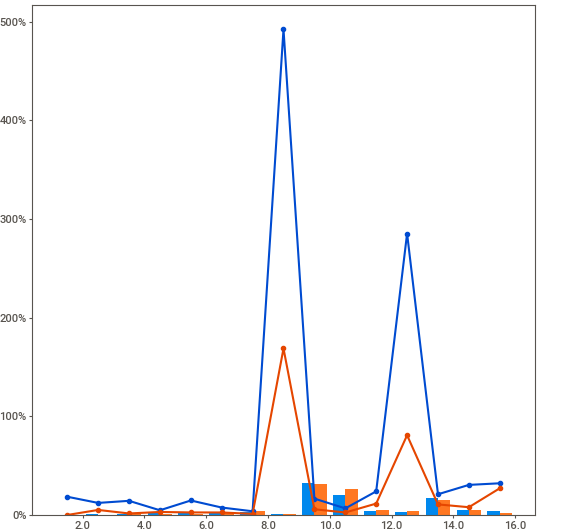
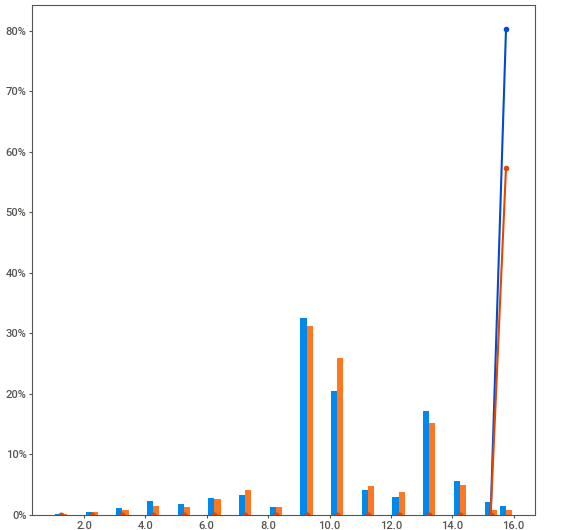
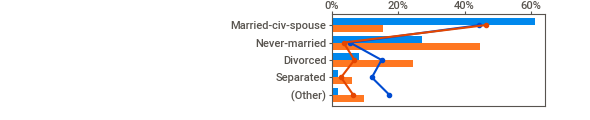
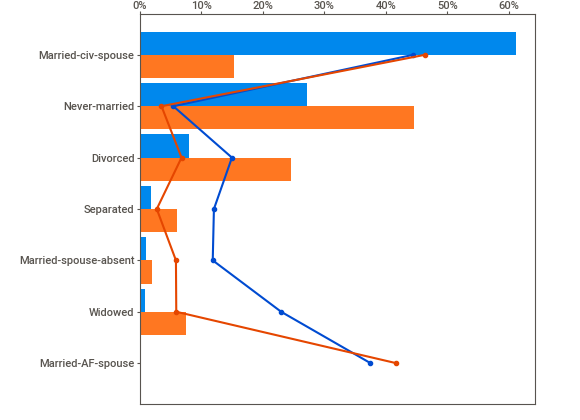
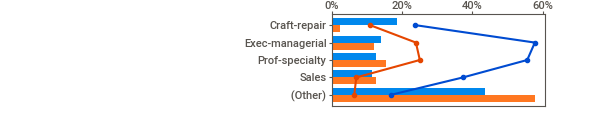
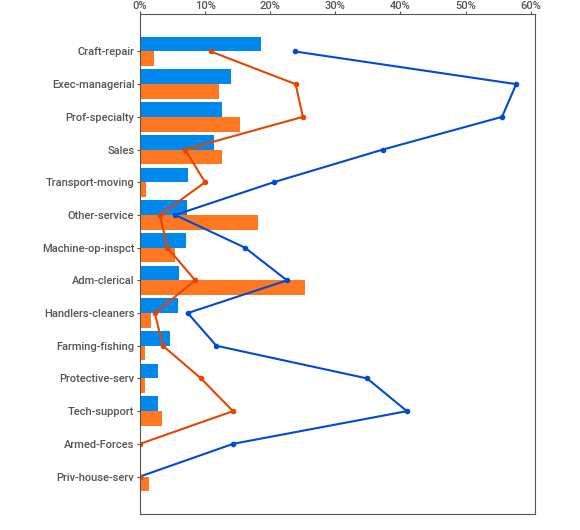
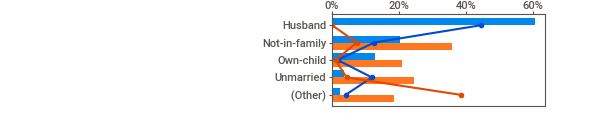
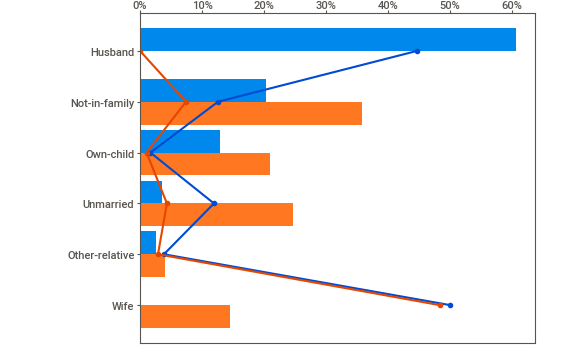
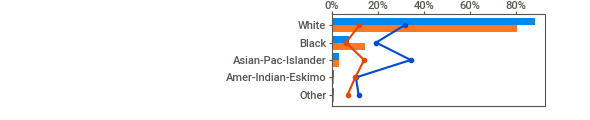
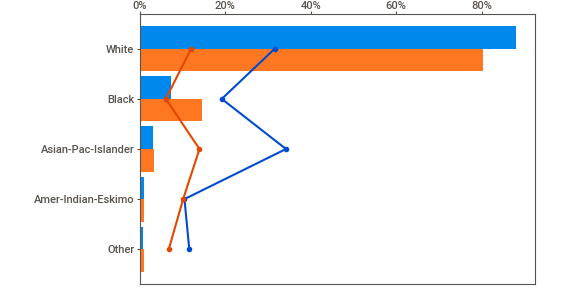
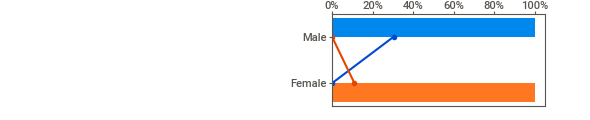
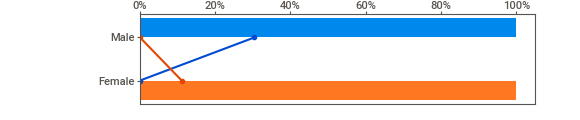
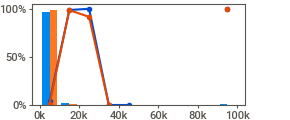
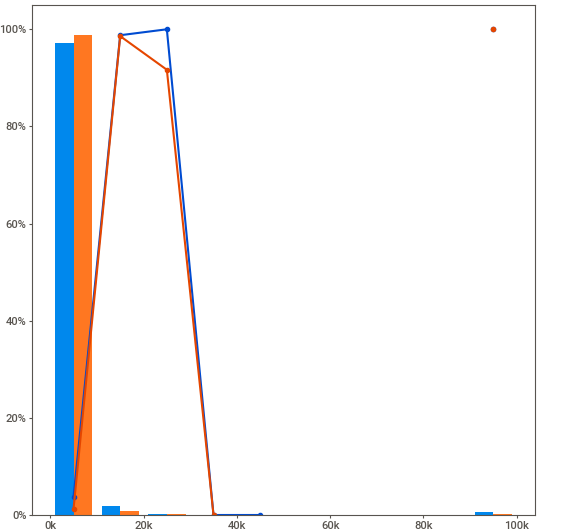
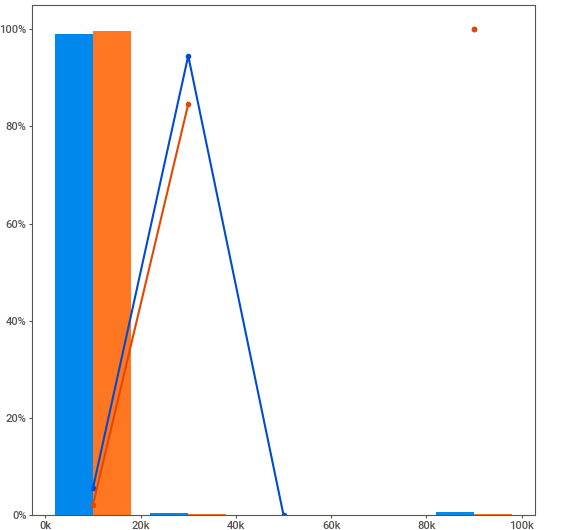
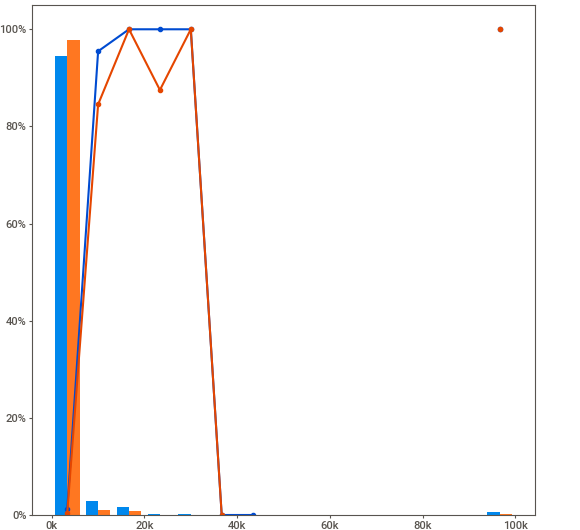
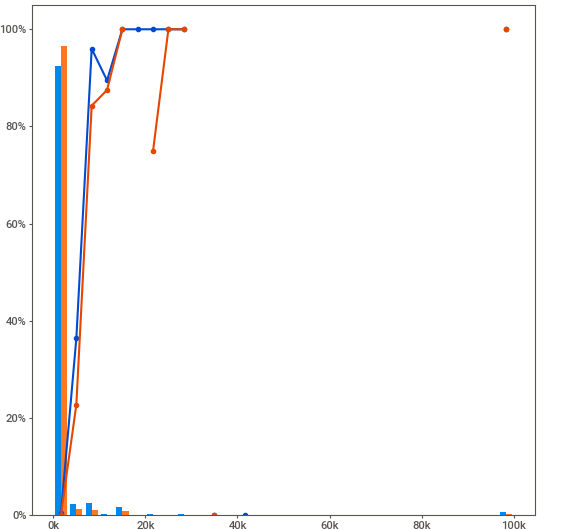
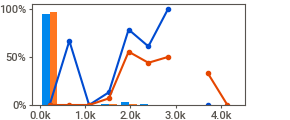
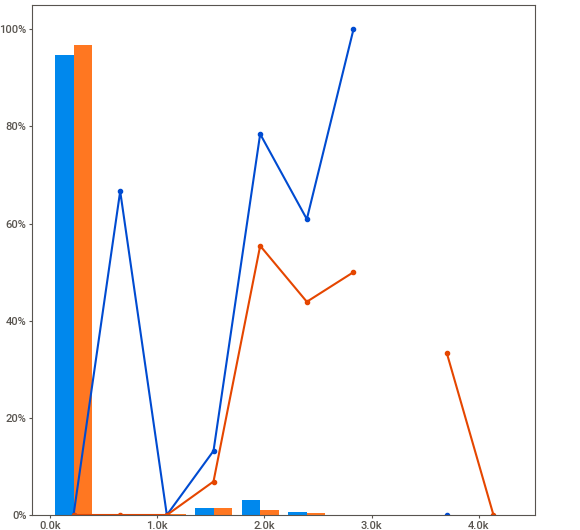
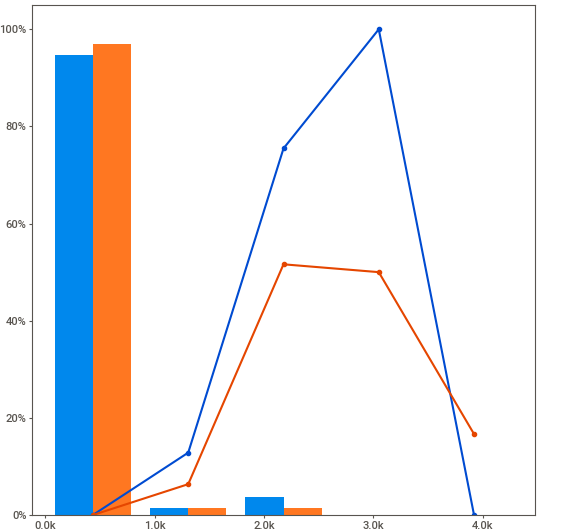
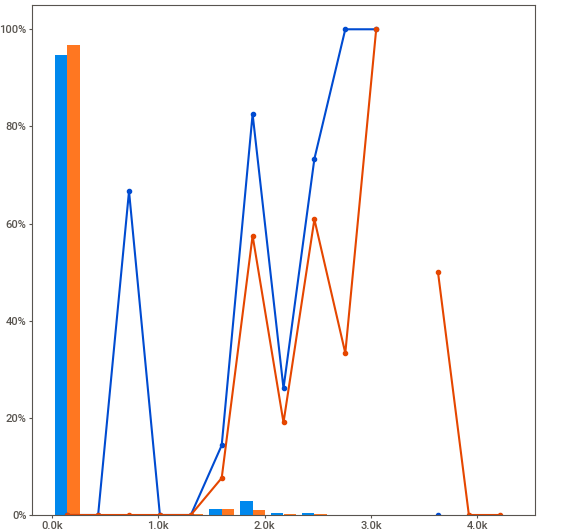
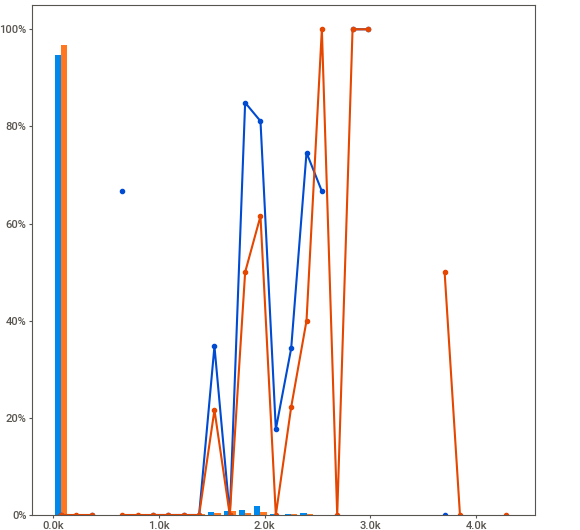
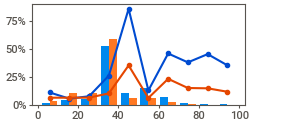
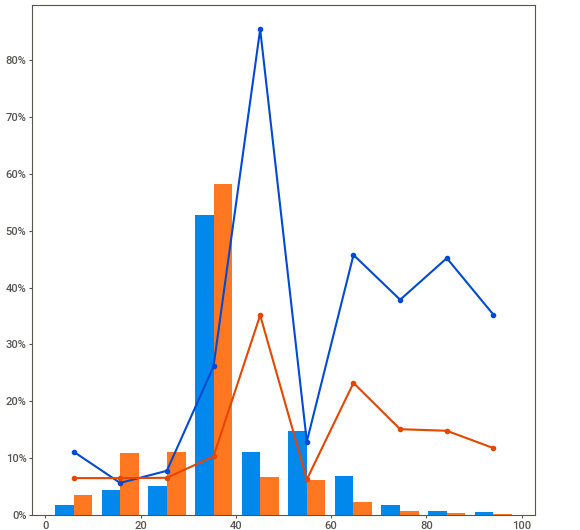
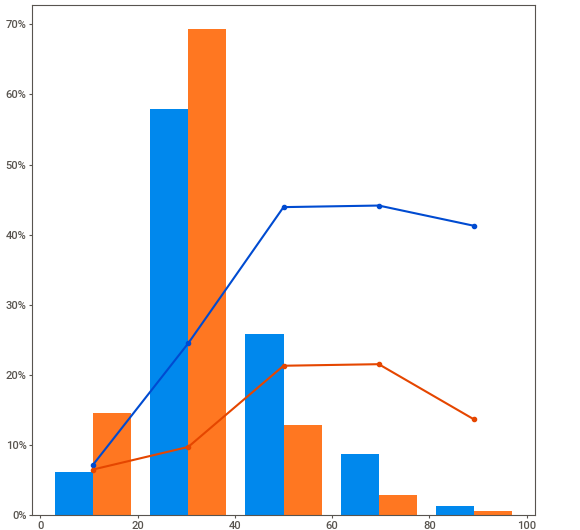
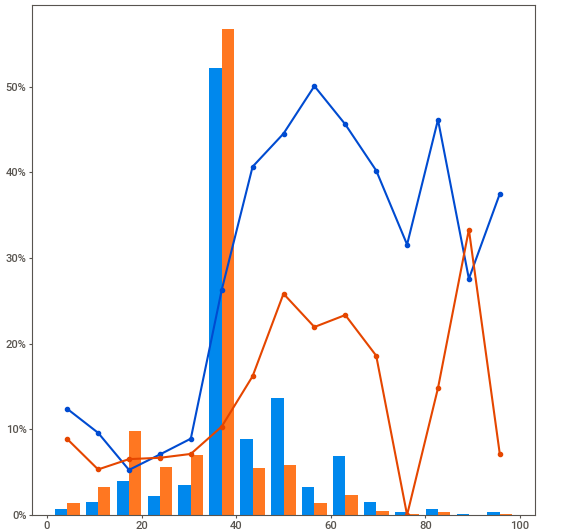
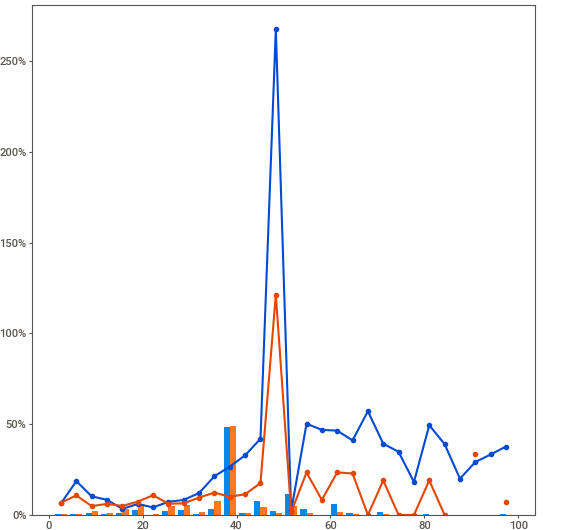
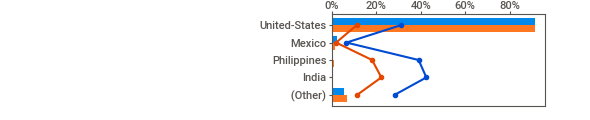
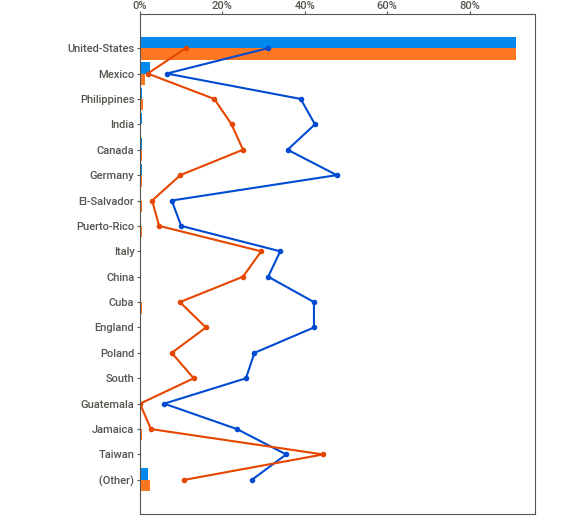
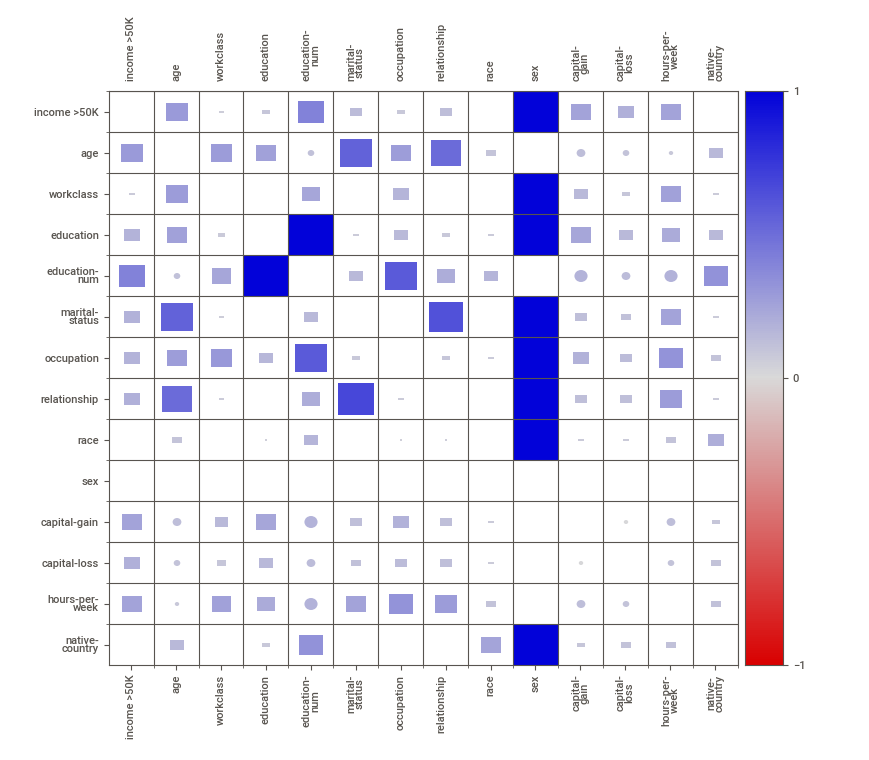
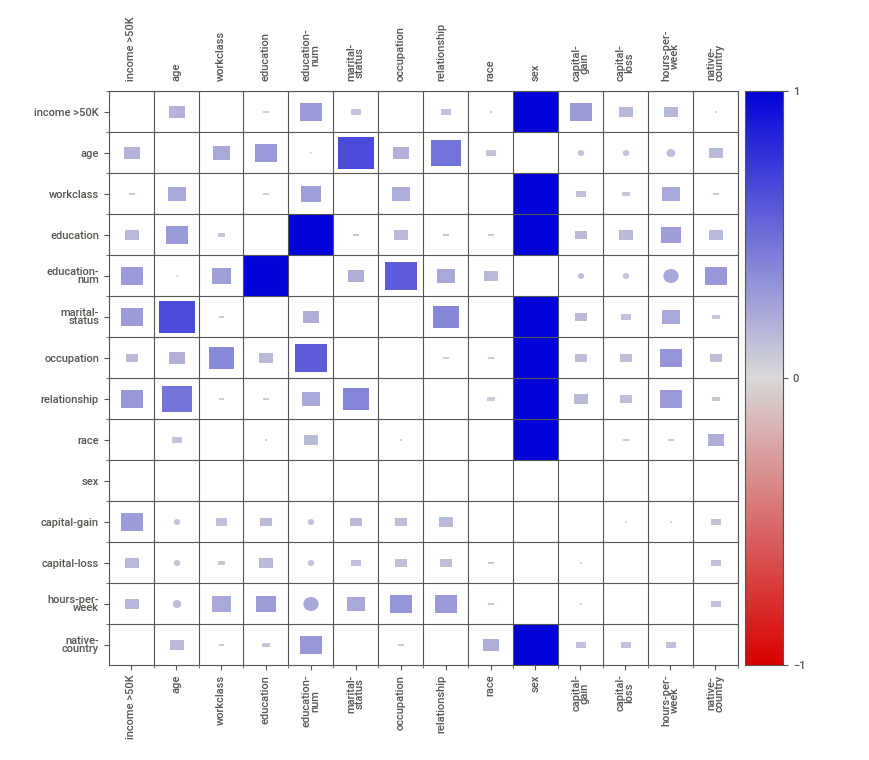

In [53]:
intra_report = sv.compare_intra(source_df= train_df, 
                                condition_series = train_df["sex"] == 'Male',
                                names= ["Male", "Female"], 
                                target_feat = 'income >50K'
                               )
intra_report.show_notebook(w=1000, h=500, scale=0.9)

- Intra Report Screenshot

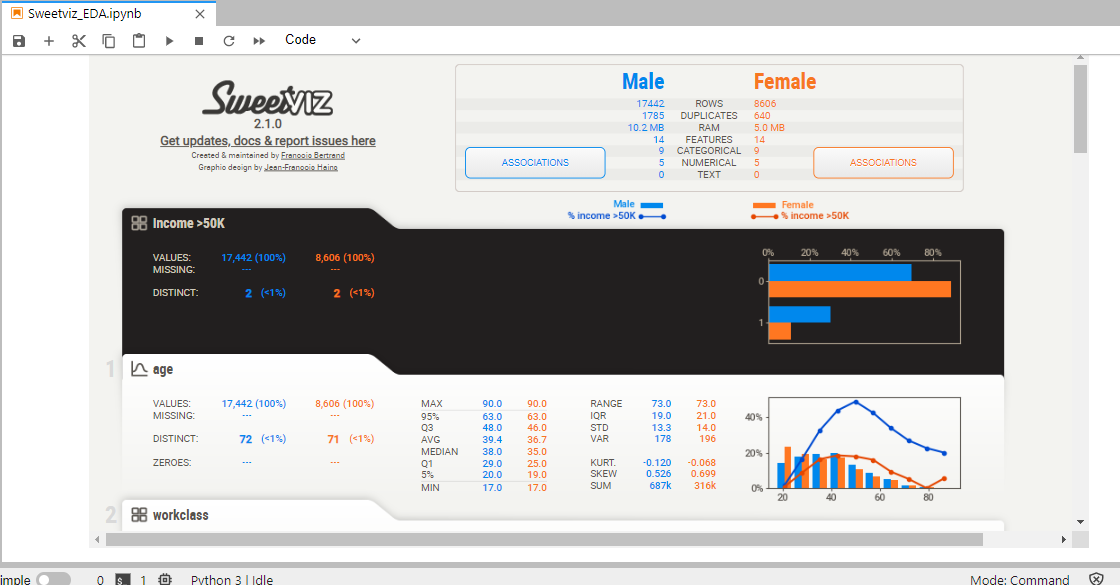

In [57]:
intra_report.show_html(filepath='intra_report.html', 
                       open_browser=True) 

Report intra_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 4. Correlation/Association analysis
A major source of insight and unique feature of Sweetviz' associations graph and analysis is that it unifies in a single graph (and detail views):

- Numerical correlation (between numerical features)
- Uncertainty coefficient (for categorical-categorical)
- Correlation ratio (for categorical-numerical)

- Here is the example of **Correlation/Association analysis** and **Feature Config settings** 

Possible parameters for the FeatureConfig parameters are:
- skip (you can ignore some variables)
- The "force_" arguments override the built-in type detection. They can be constructed as follows:
    - force_cat
    - force_num
    - force_text 

                                             |                                             | [  0%]   00:00 ->…


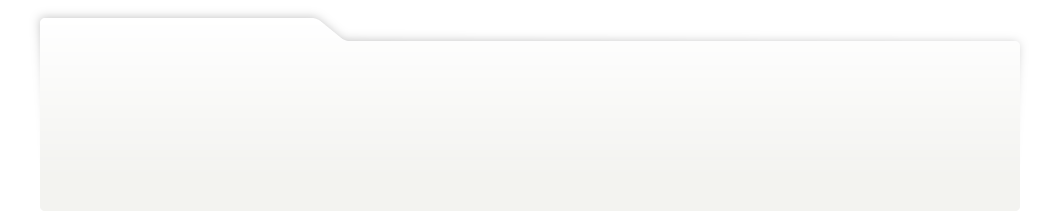
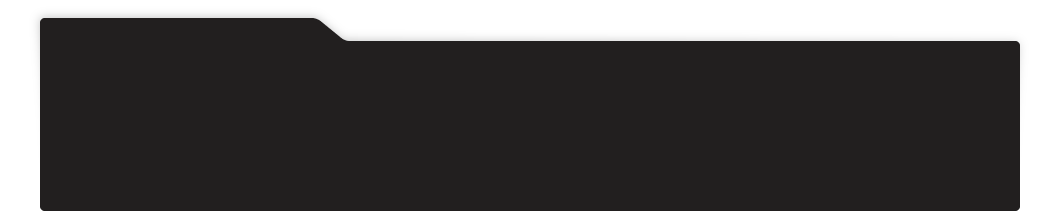
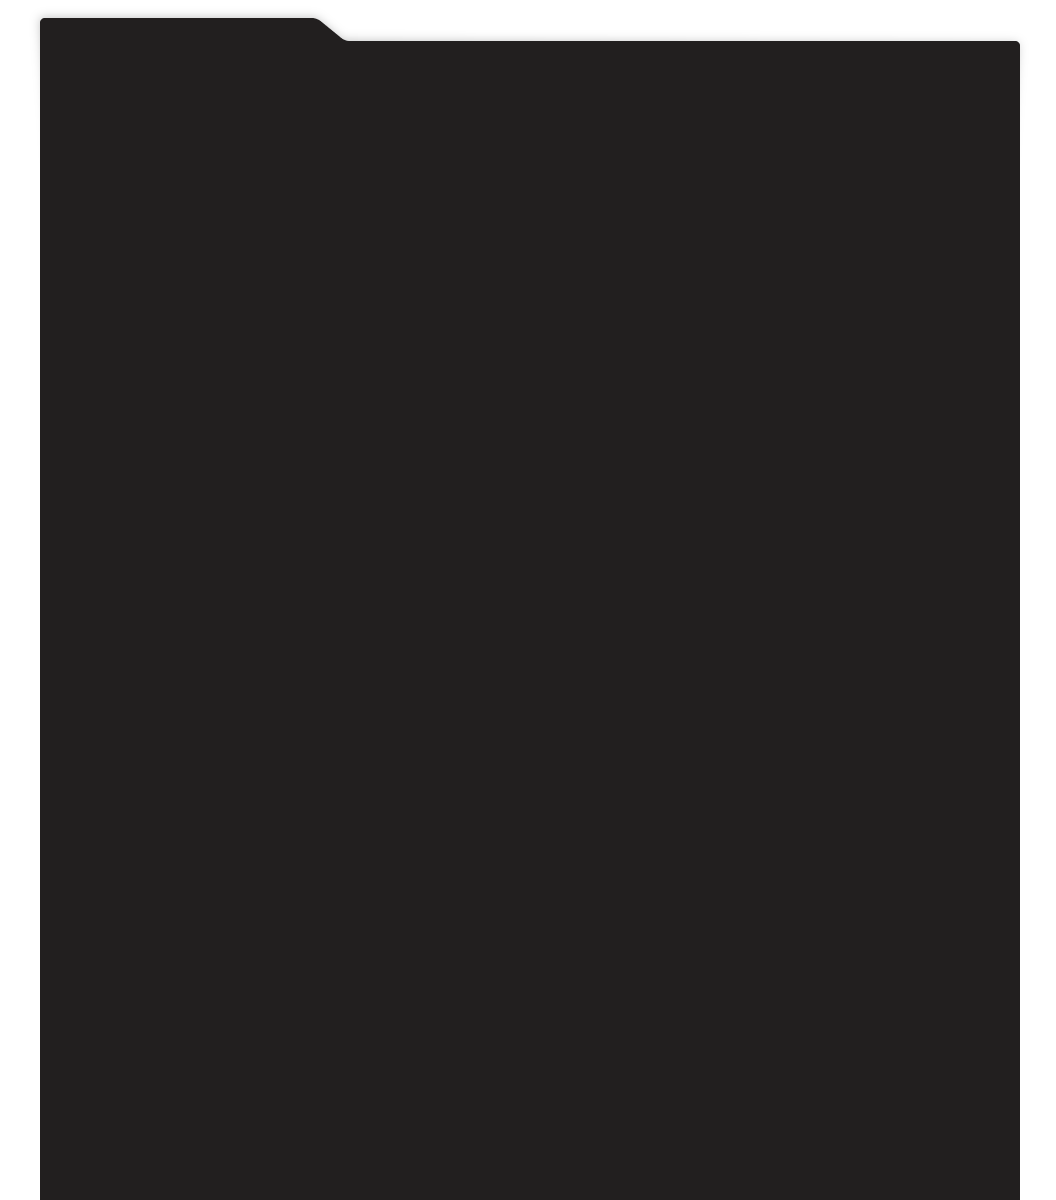
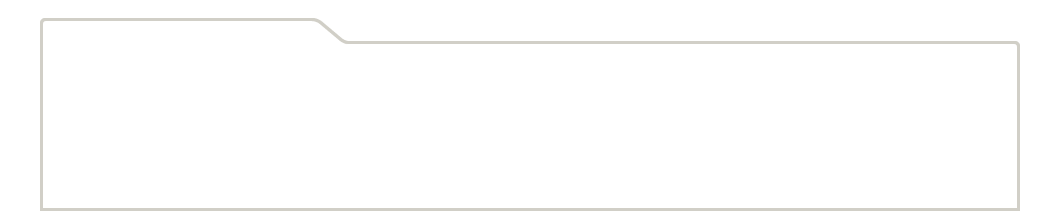
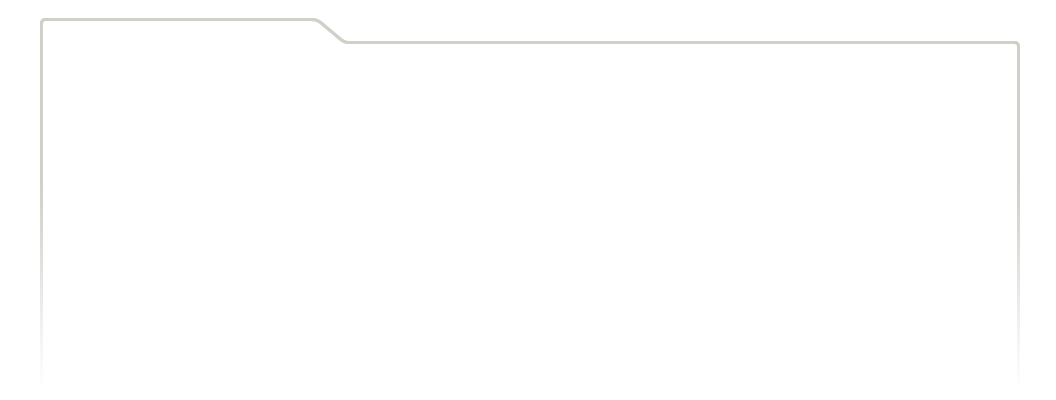
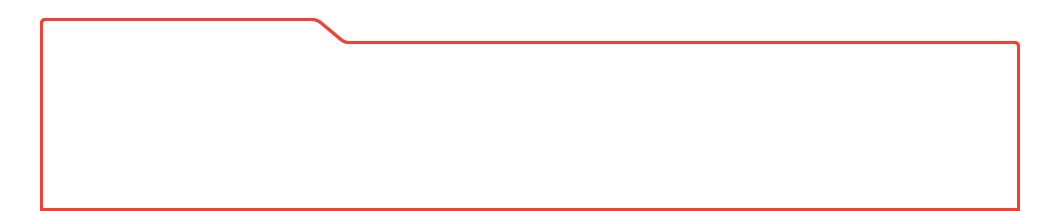
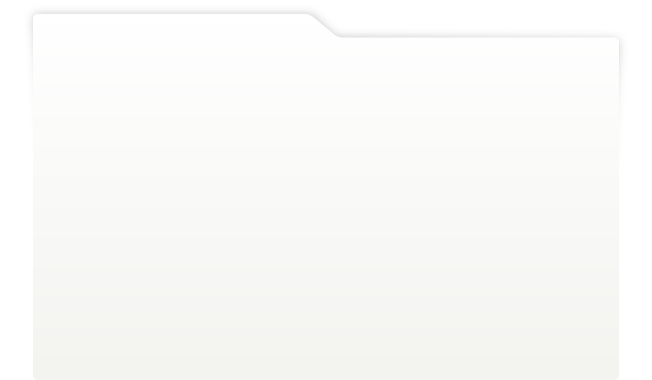
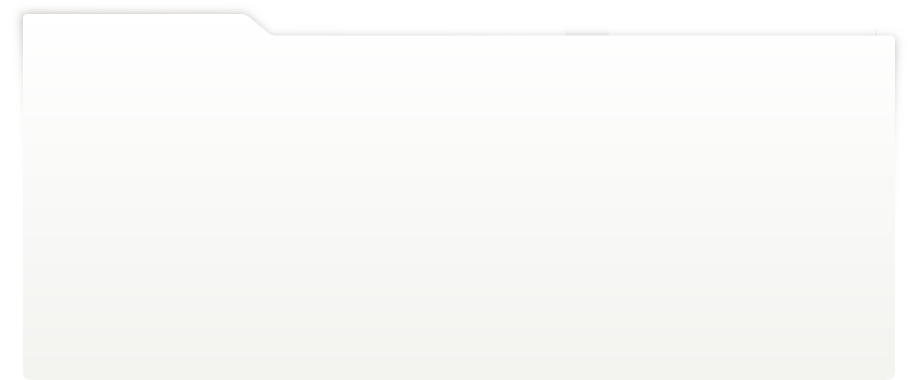
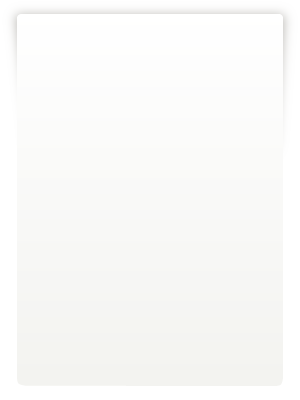
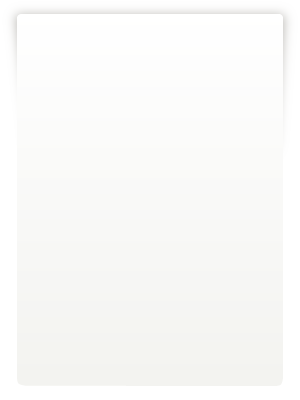
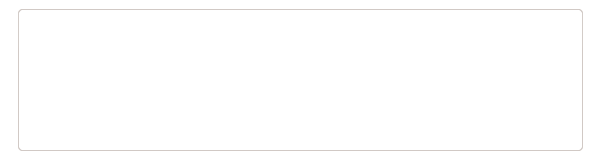
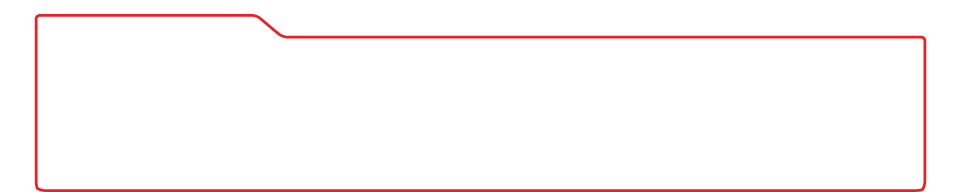
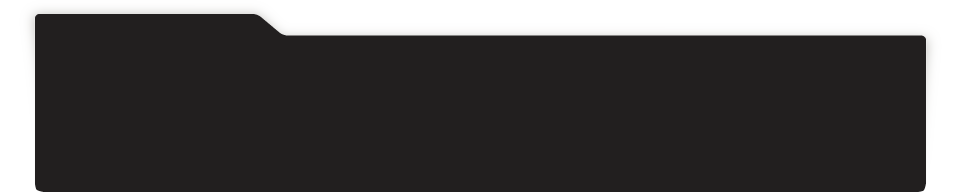
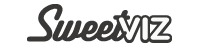
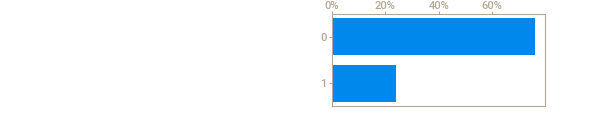
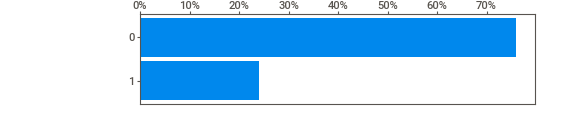
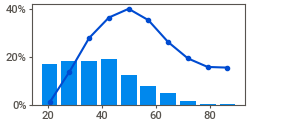
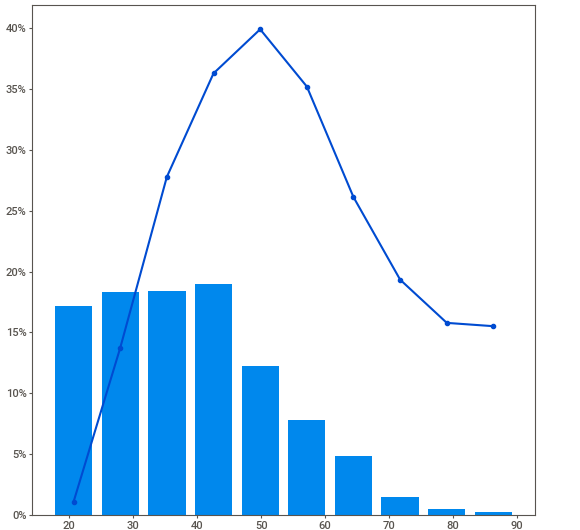
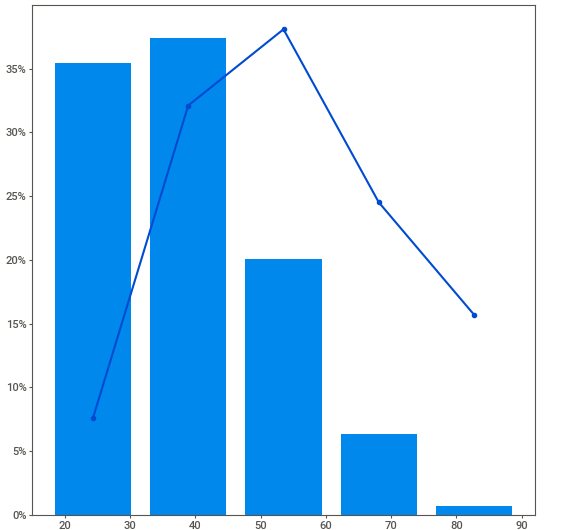
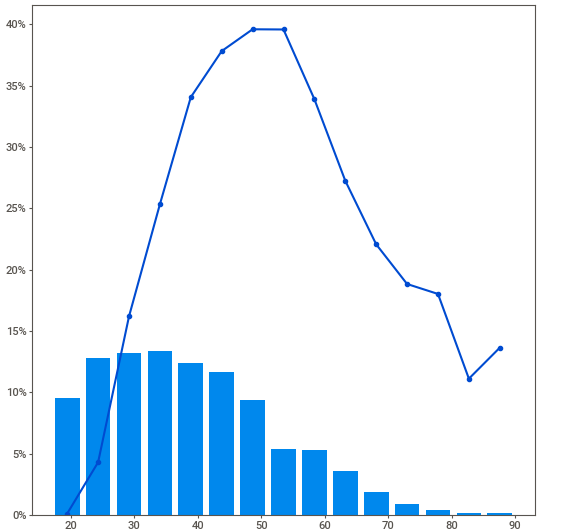
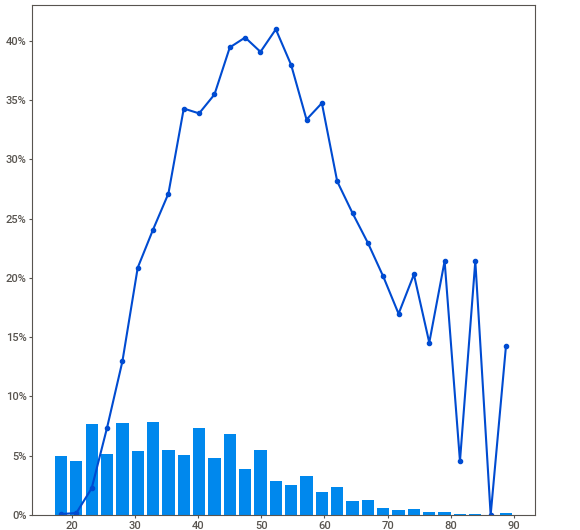
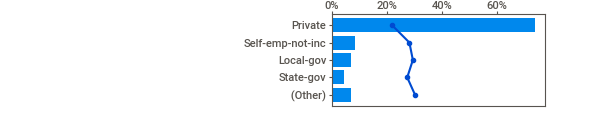
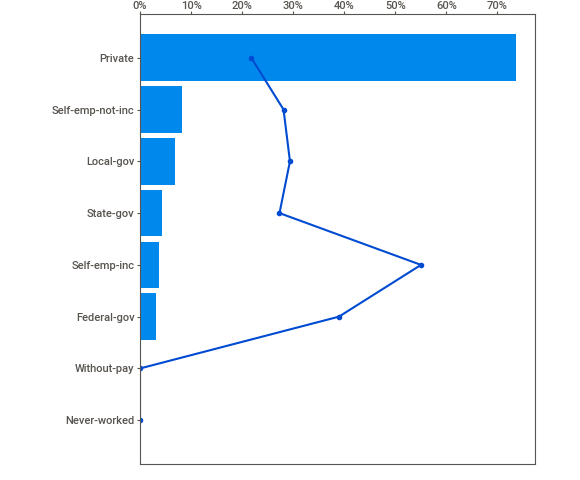
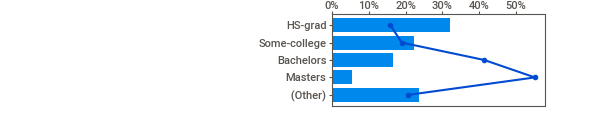
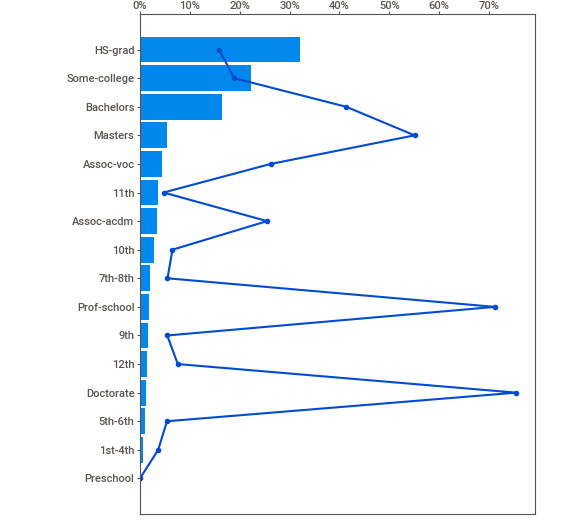
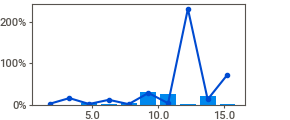
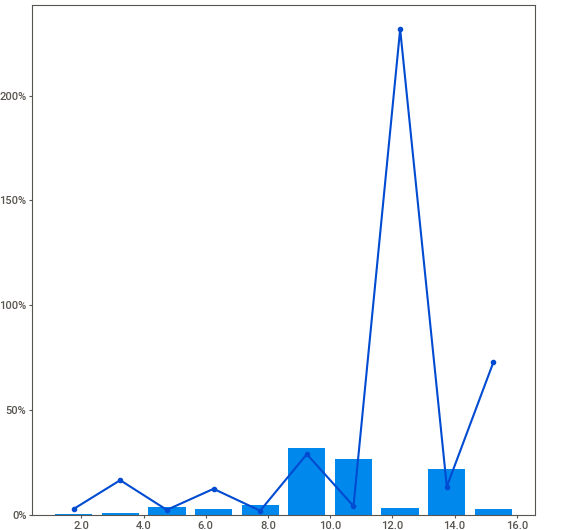
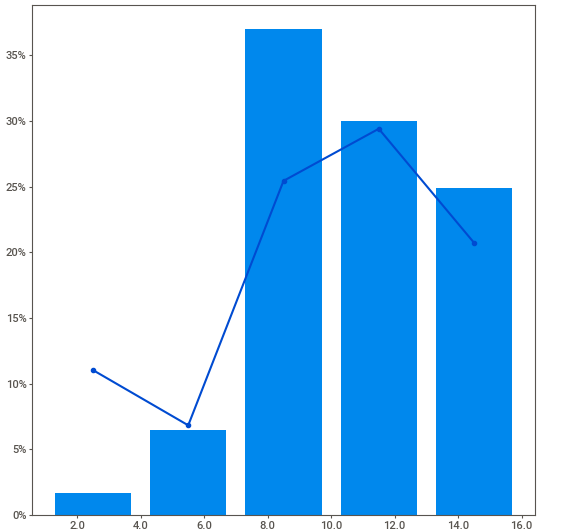
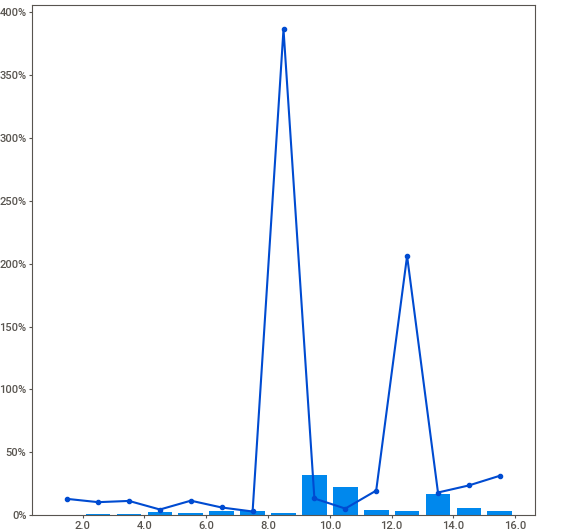
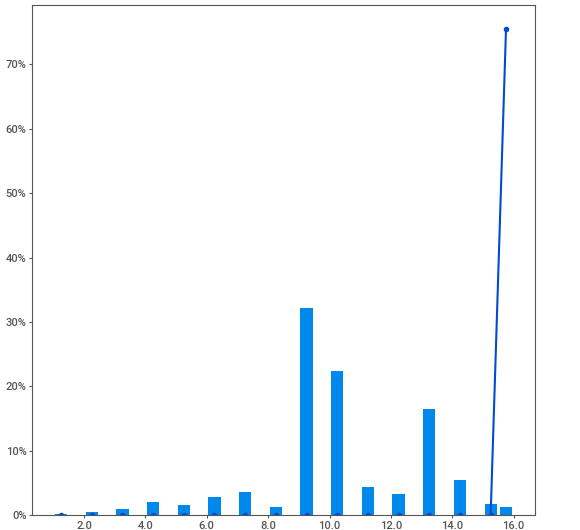
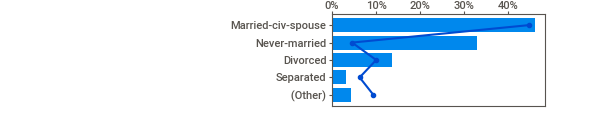
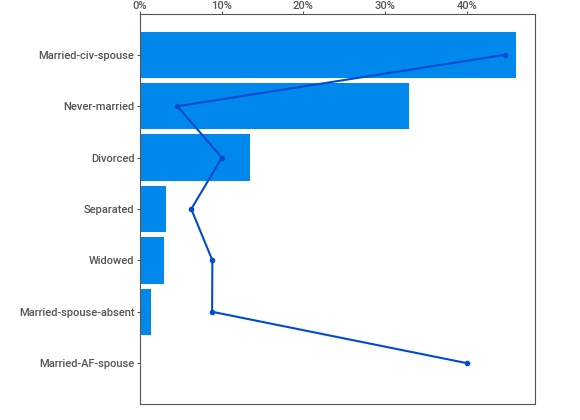
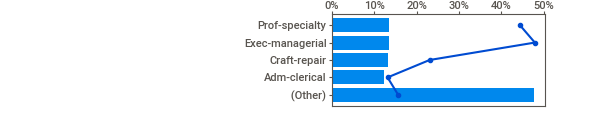
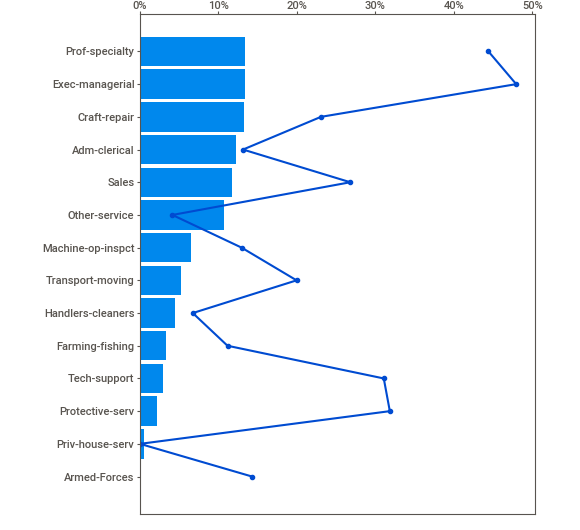
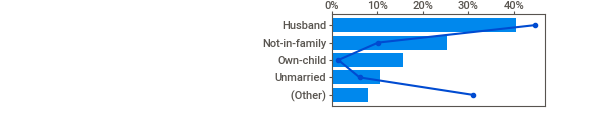
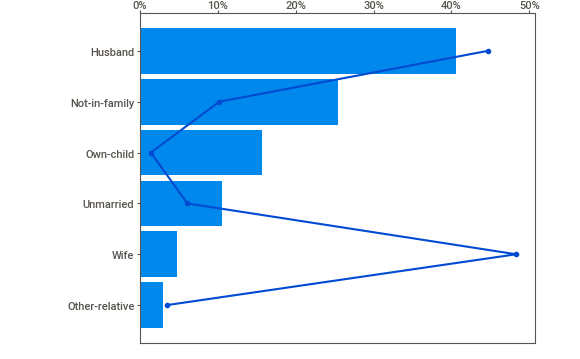
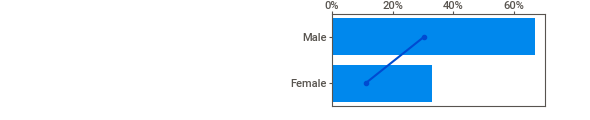
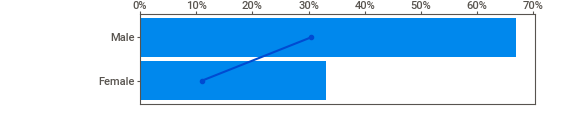
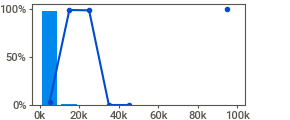
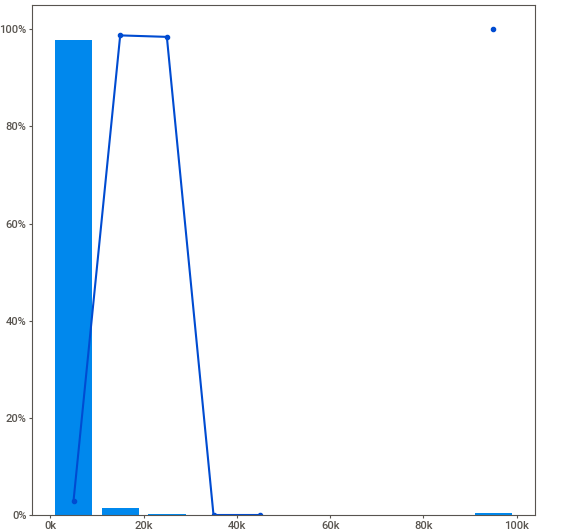
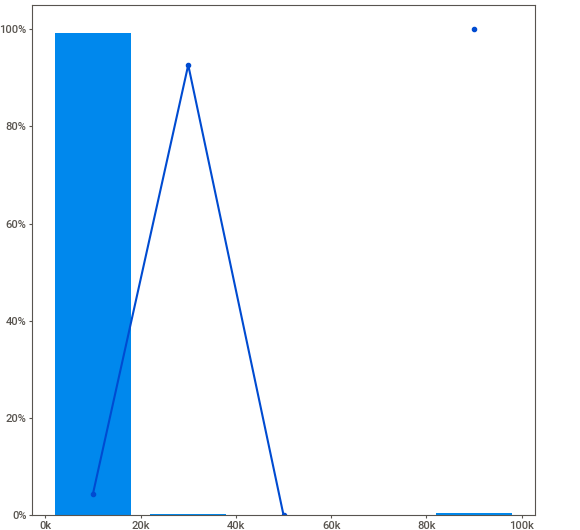
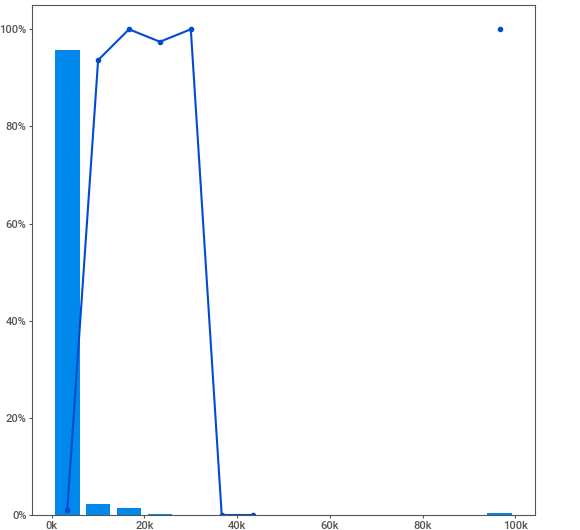
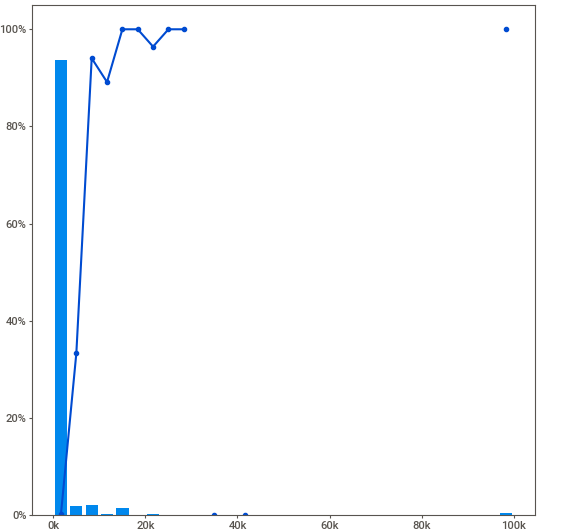
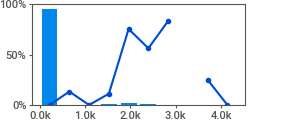
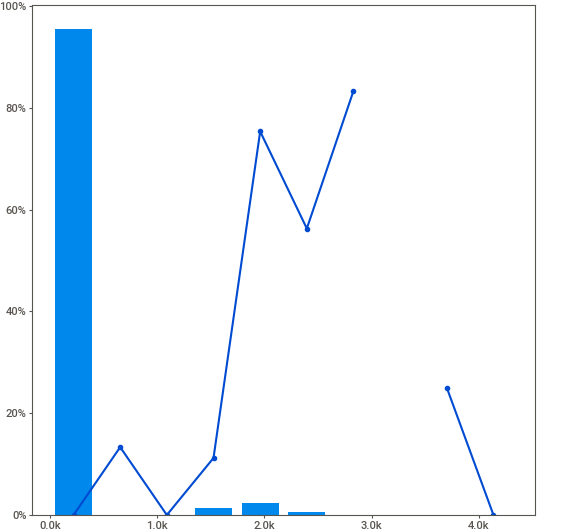
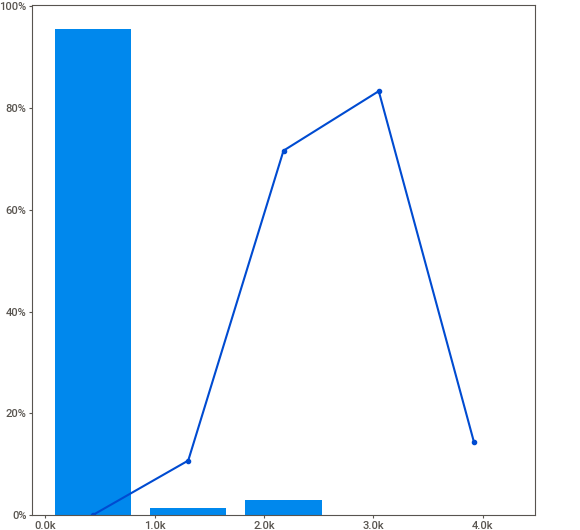
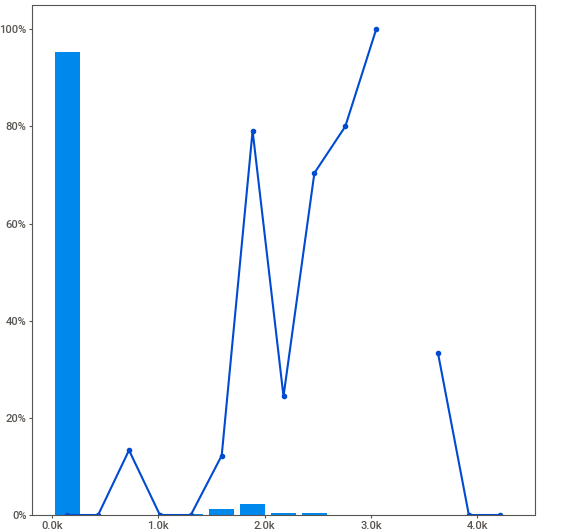
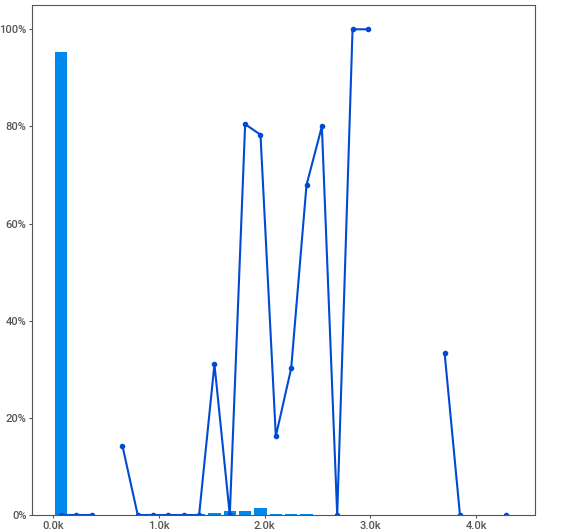
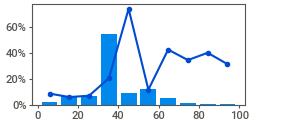
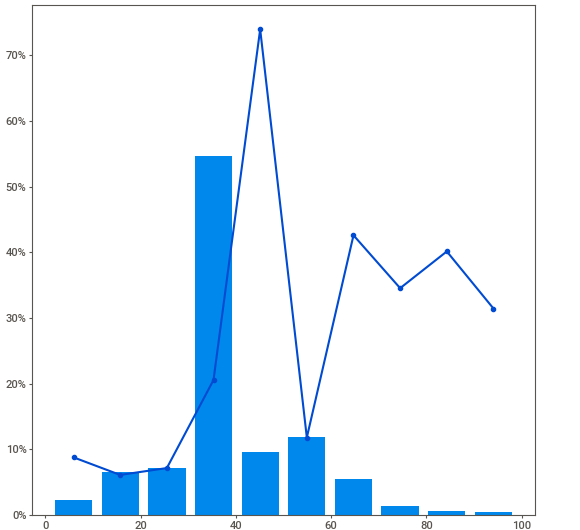
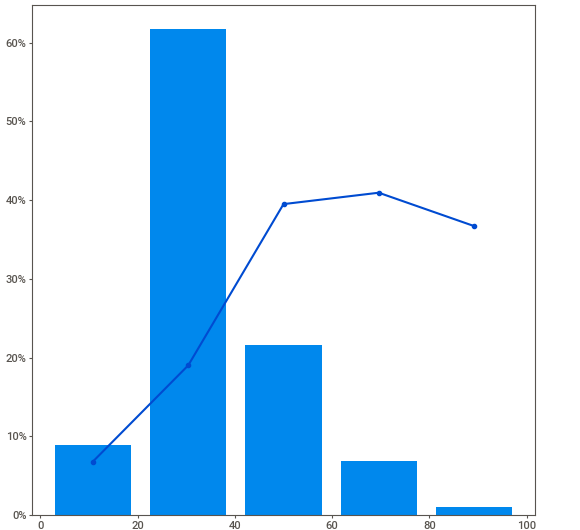
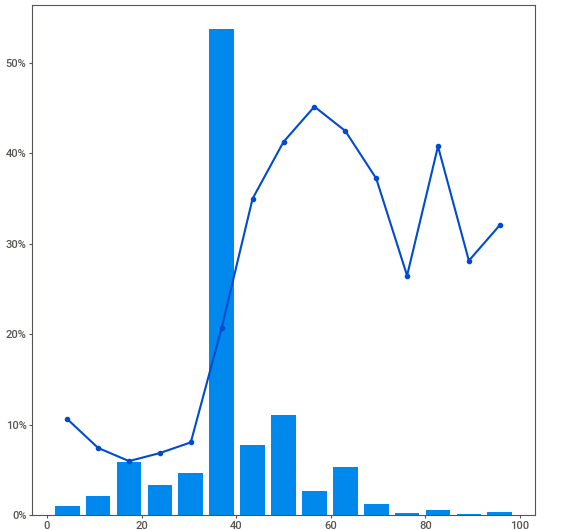
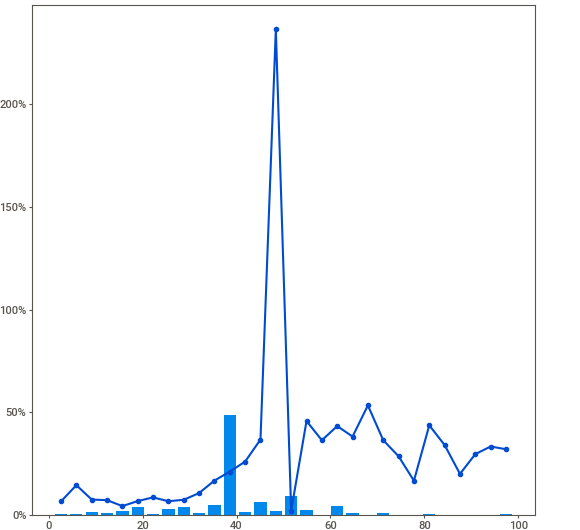
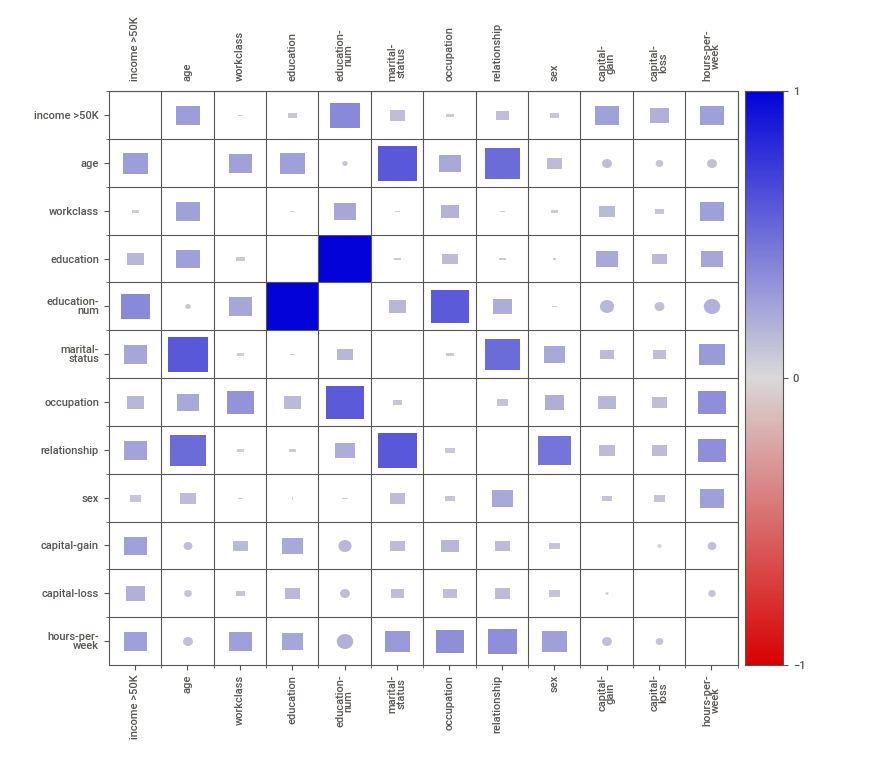
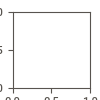

In [9]:
feature_config = sv.FeatureConfig(skip=["native-country","race"], force_num=["age"])
analyze_report = sv.analyze([train_df,'Train'], 'income >50K', feature_config)
analyze_report.show_notebook(w=1000, h=600, scale=0.9) #click association buttom

- Correlation/Association analysis Screenshot

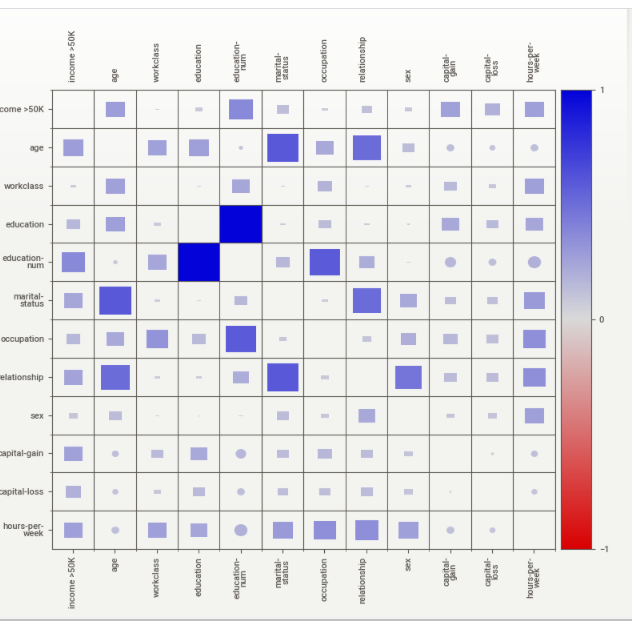

In [8]:
analyze_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
